<center><h1 style="border-style:solid;padding:.5cm;border-color:navy;border-radius:25px"> Stochastic Gradient Descent - Machine Learning 2015-2016</h1></center>
<a id='top'></a>
<div style="margin-top:1cm;">Author: Afentoulidis Gregory</div>
<div>Student ID : 4521862</div>


<h3>Table of contents</h3>
<ul>
    <li><a href='#intro'>Introduction</a></li>
    <li><a href='#exA'>Exercise A</a></li>
    <ul>
        <li><a href='#eplots'>Plots of loss in one epoch</a></li>
        <li><a href='#aniepoch'>Animated loss plots for one epoch</a></li>
    </ul>
    <li><a href='#exB'>Exercise B</a></li>
    <ul>
        <li><a href='#batchSteps'>Animation of first few steps with Batch Gradient Descent</a></li>
        <li><a href='#miniSteps'>Animation of first few steps with Mini Batch Gradient Descent</a></li>
        <li><a href='#onlineSteps'>Animation of first few steps with Stochastic Gradient Descent</a>
    </ul>
    <li><a href='#exC'>Exercise C</a></li>
    <li><a href='#exD'>Exercise D</a></li>
    <li><a href='#exE'>Exercise E</a></li>
    <li><a href='#exF'>Exercise F</a></li>
    <li><a href='#exG'>Exercise G</a></li>
    <li><a href='#exH'>Exercise H</a></li>
    <li><a href='#exI'>Exercise I</a></li>
</ul>

<a id="intro"></a>
<center> <h2 style="border-top:solid;padding-top:1cm"> Introduction</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<p style="font-size:large">A plot of the loss function and finding the global minimum </p>

In [692]:
# import packages
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bp
import matplotlib.animation as animation
from bokeh.models import WheelZoomTool,ResetTool,PanTool
from JSAnimation import IPython_display
import time
import math
W = 590
H = 350
bp.output_notebook()


Global minimun of loss function is at point (-1.19,-3.21)


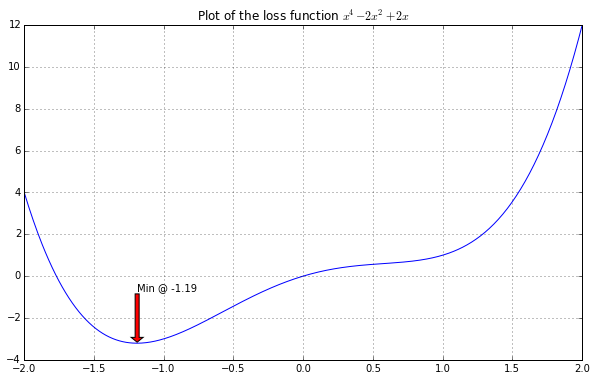

In [2]:
#plotting the loss function
x = np.linspace(-2.,2.,500)
y = x**4 - 2*x**2 + 2*x
i = np.argmin(y)
print("Global minimun of loss function is at point (%.2f,%.2f)"%(x[i],y[i]))
fig = plt.figure()
ax = plt.axes()
plt.plot(x,y)
plt.title("Plot of the loss function $x^{4}-2x^{2}+2x$")
plt.grid(True)
ax.annotate('Min @ '+str(round(x[i],2)),xy=(x[i],y[i]),\
            xytext=(x[i],y[i]+2.5),\
            arrowprops=dict(facecolor='red',shrink=0.02))


<p style="font-size:large">Testing interactive plots </p>

In [390]:
x = np.linspace(-15,21,100)
y = x**2-6*x+5

TOOLS =[WheelZoomTool(),ResetTool(),PanTool()]

s1 = bp.figure(width=W,plot_height=H,
              title='Local minimum of function',
              tools=TOOLS)
s1.line(x,y,color='navy',alpha=0.5,line_width=2)
s1.circle(3,-4,size=10,color='orange')
s1.title_text_font_size='16pt'
s1.yaxis.axis_label_text_font_size='14pt'
s1.xaxis.axis_label_text_font_size='14pt'

bp.show(s1)


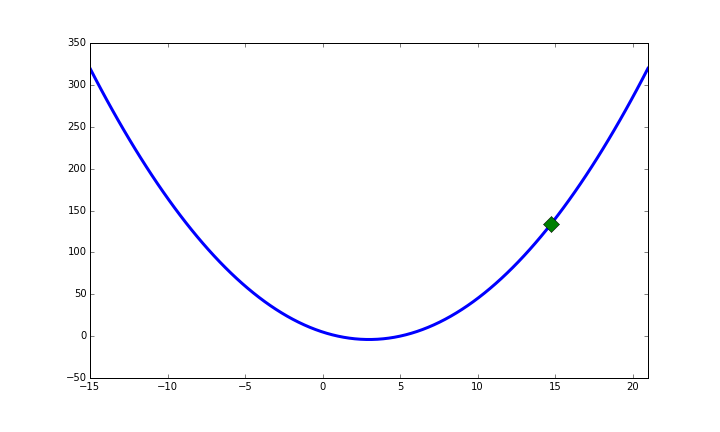
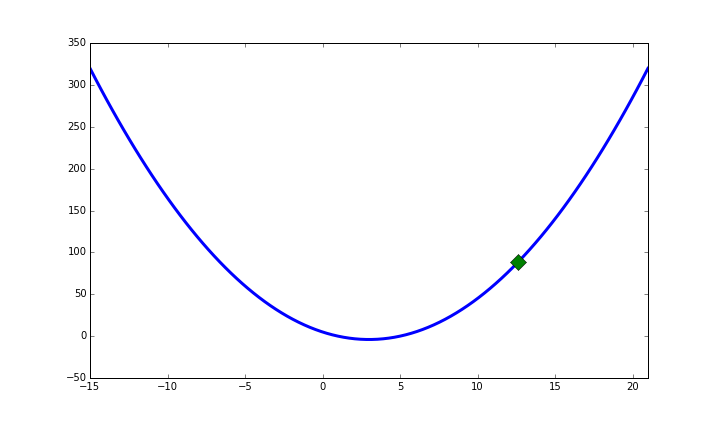
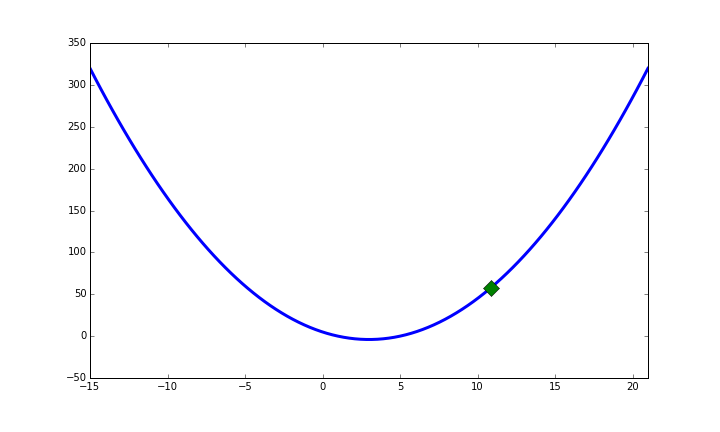
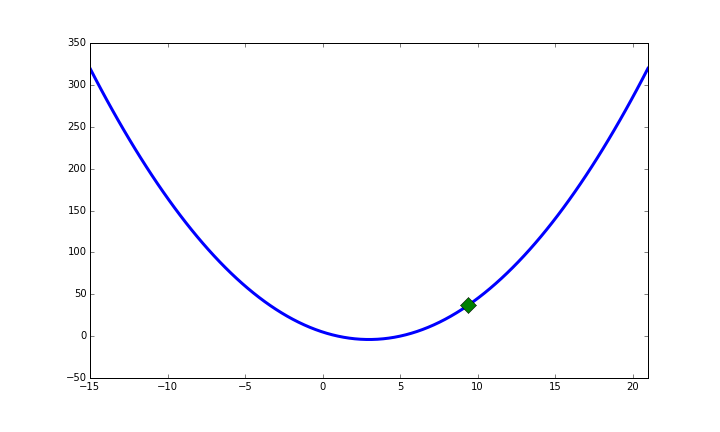
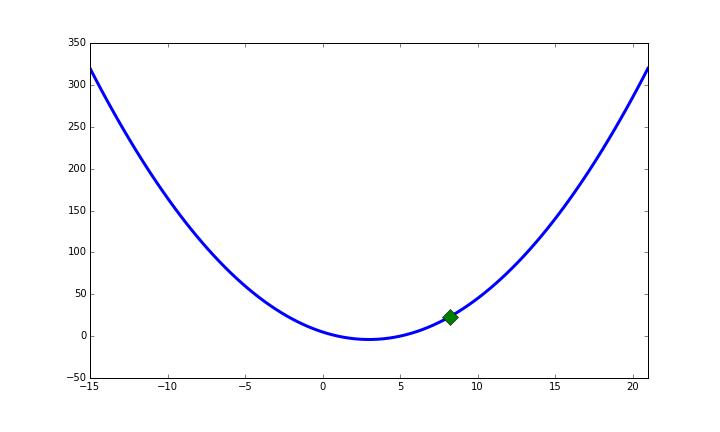
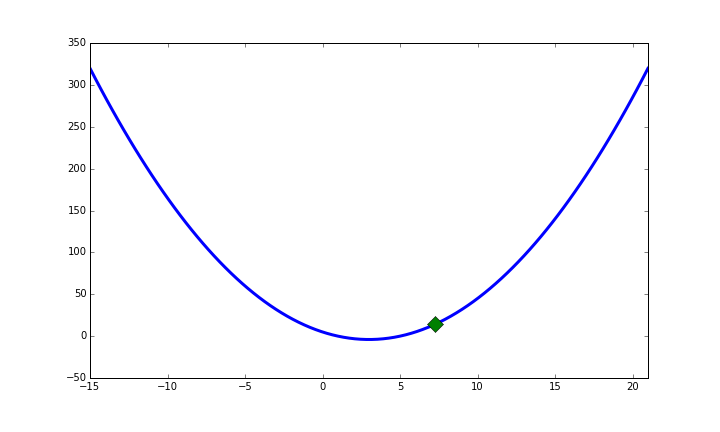
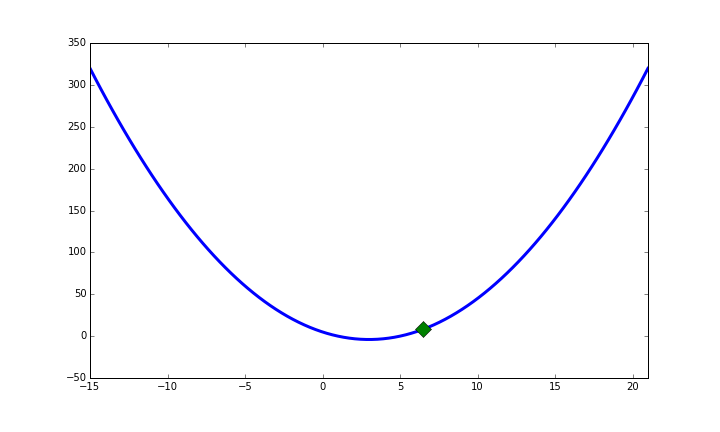
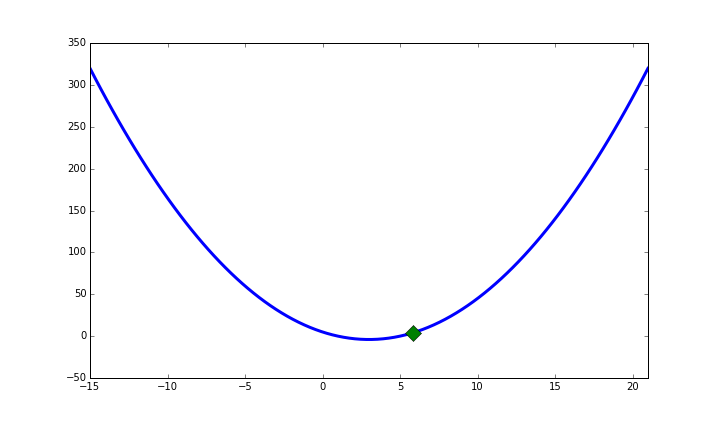
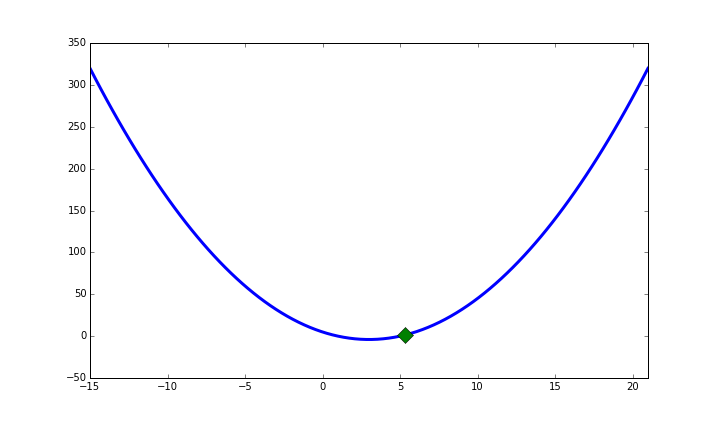
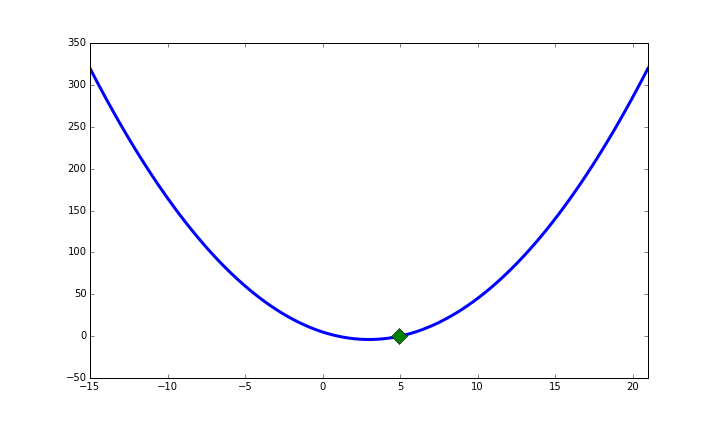
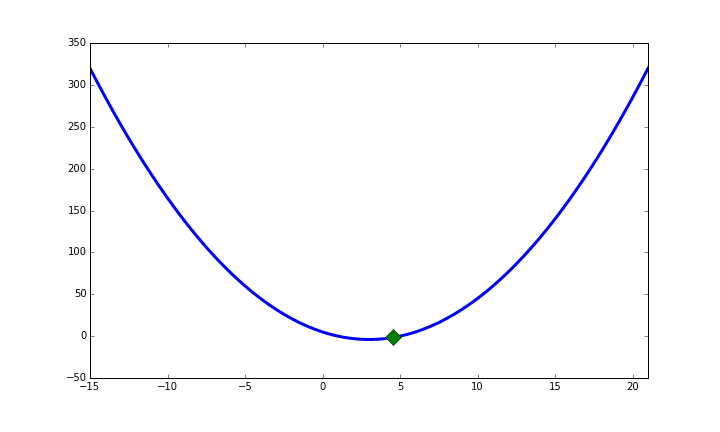
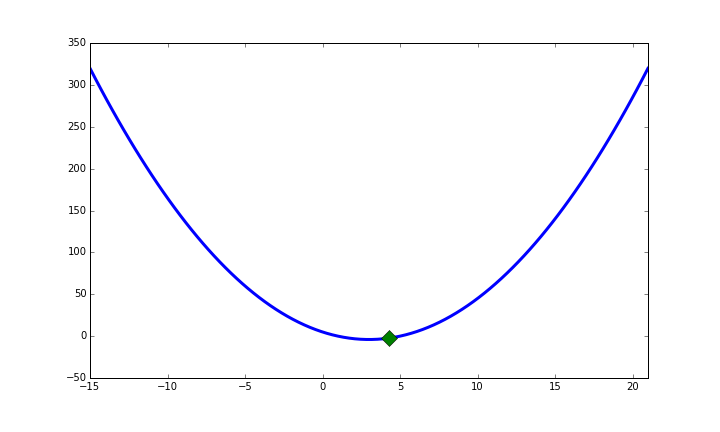
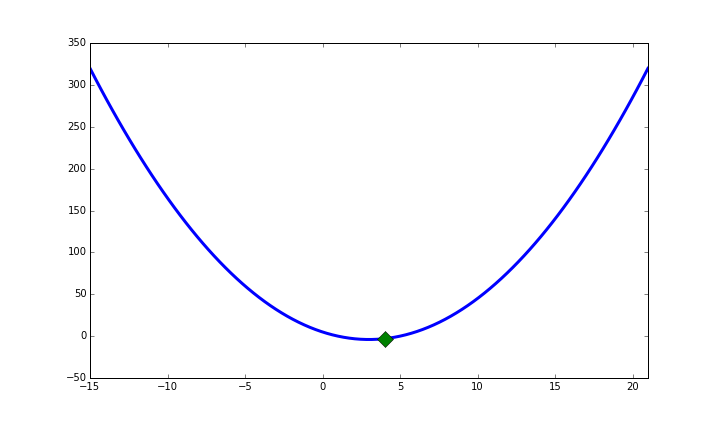
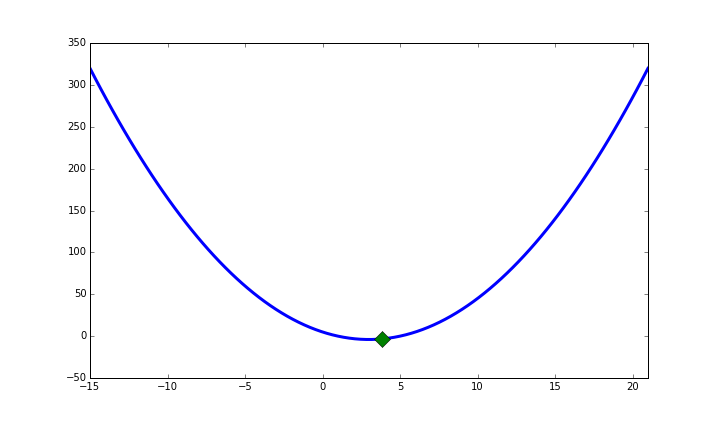
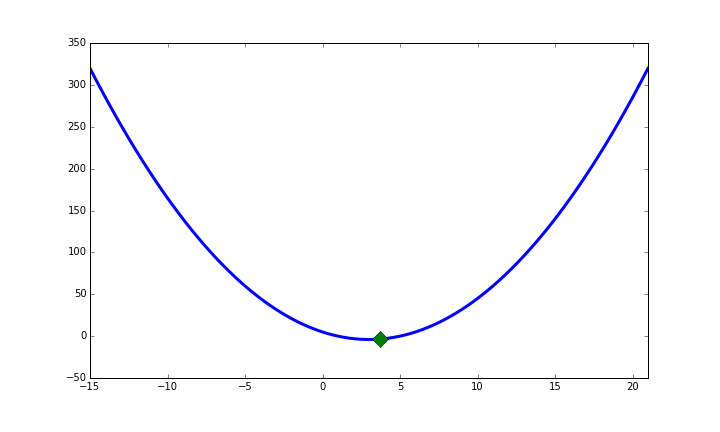
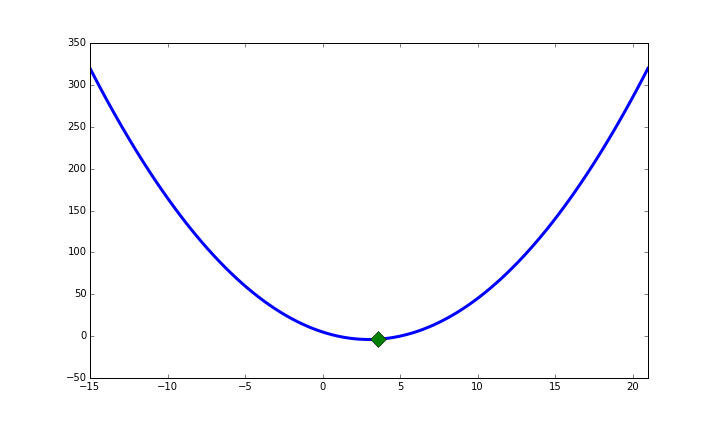
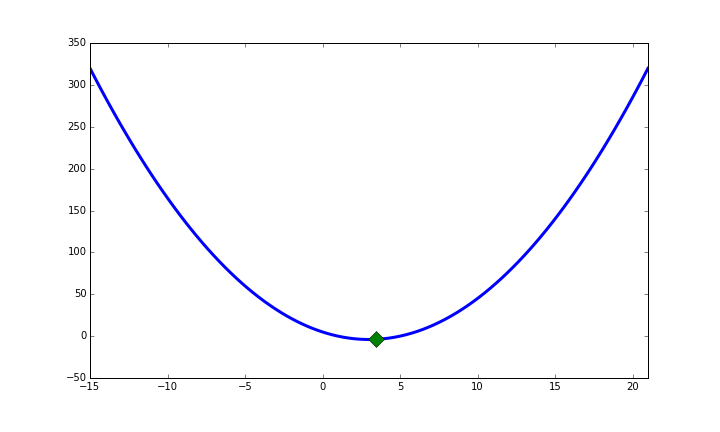
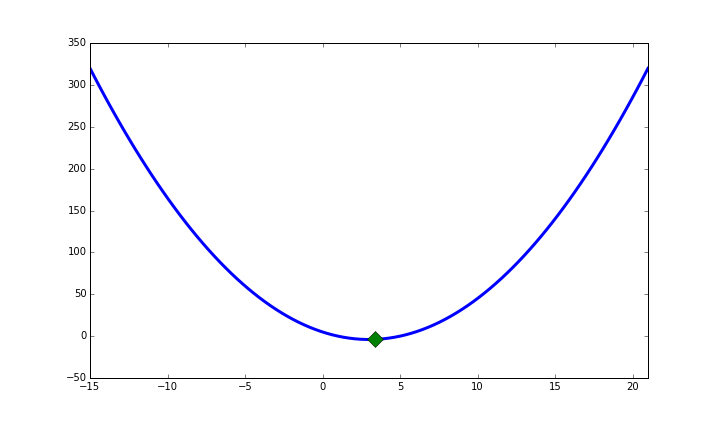
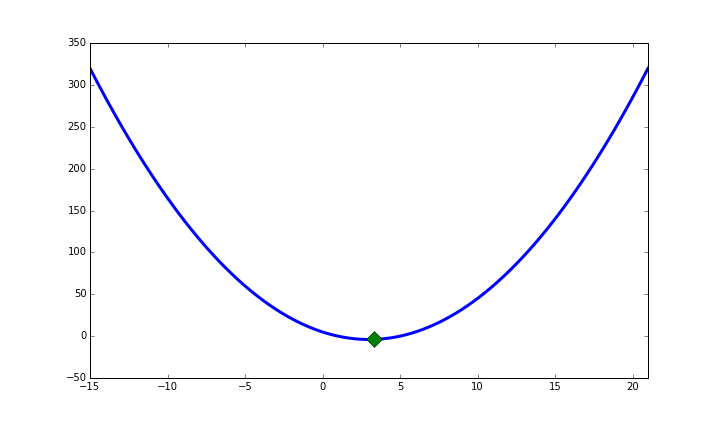
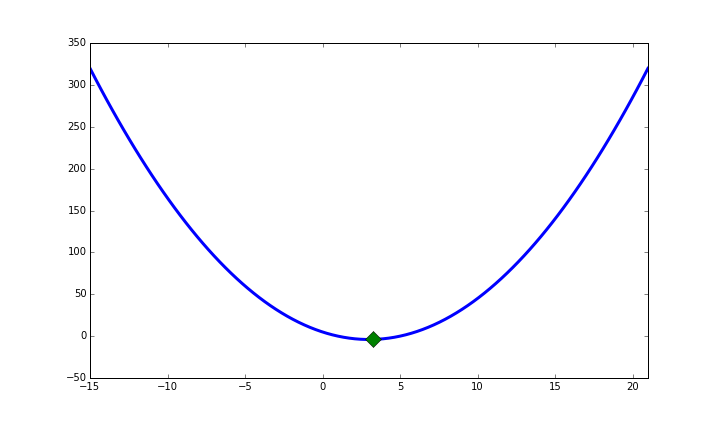
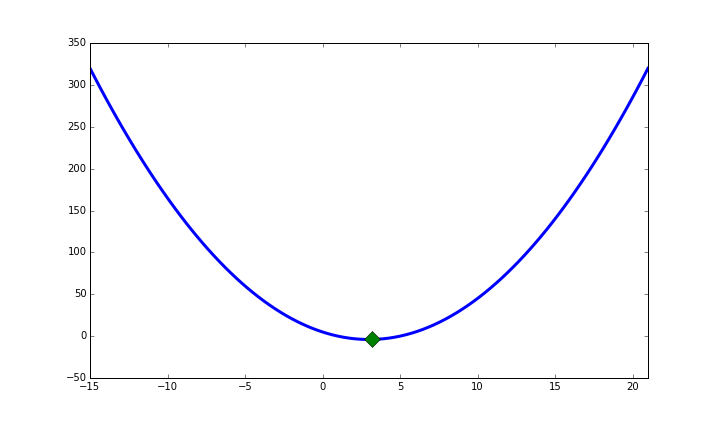
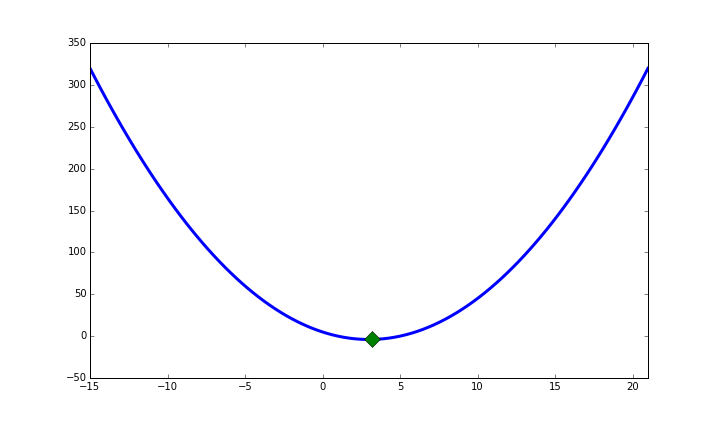
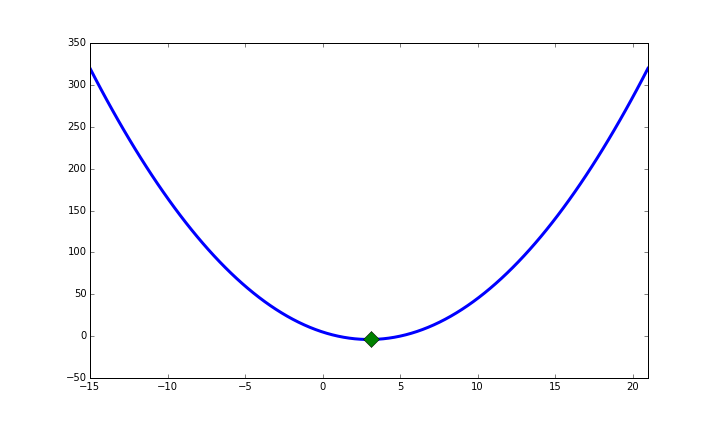
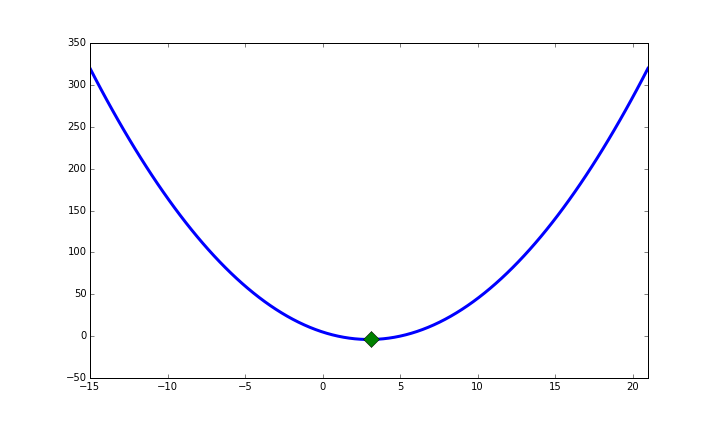
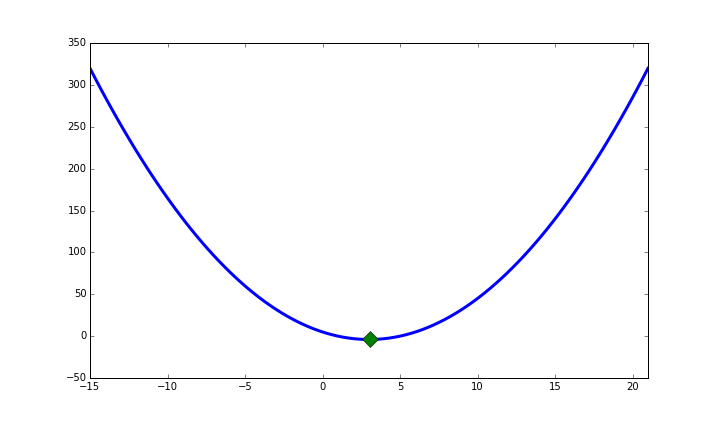
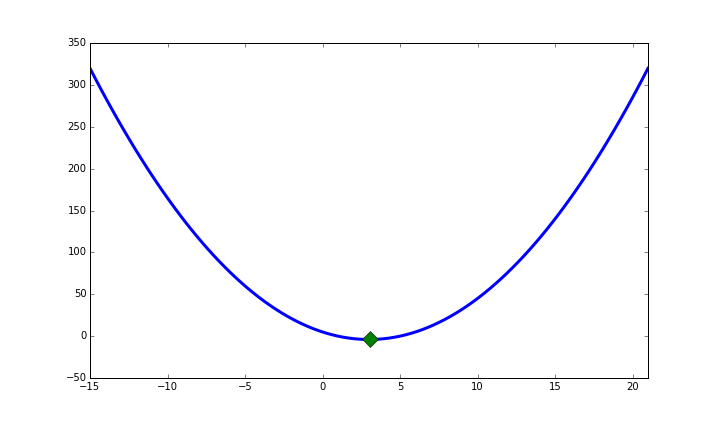
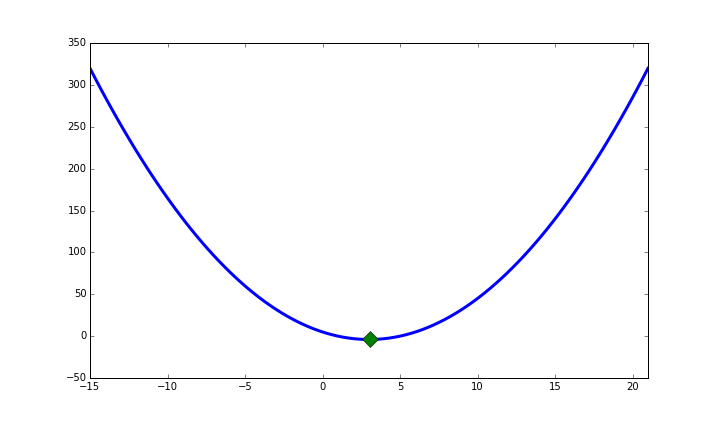
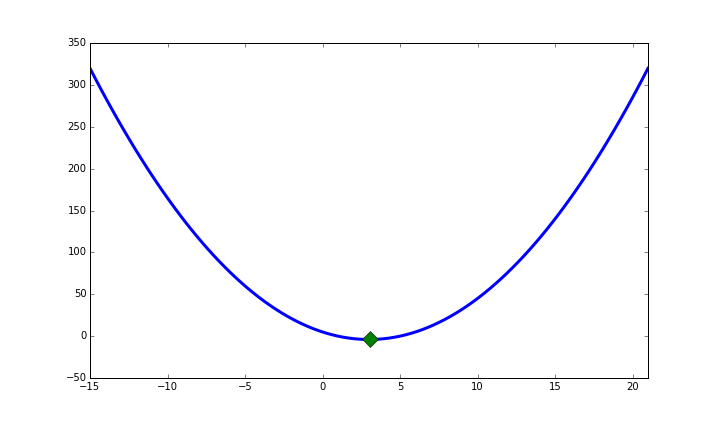

In [391]:
old_min = 0
temp_min = 15
step_size = 0.01
precision = 0.001
 
def f_derivative(x):
    return 2*x -6

mins = []
cost = []

while abs(temp_min - old_min) > precision:
    old_min = temp_min 
    gradient = f_derivative(old_min) 
    move = gradient * step_size
    temp_min = old_min - move
    cost.append((3-temp_min)**2)
    mins.append(temp_min)

def init():
    line.set_data([],[])
    return line,

def animate(i):
    x_n = mins[0::10][i]
    y_n = x_n**2-6*x_n+5
    line.set_data(x_n,y_n)
    return line,

fig = plt.figure()
ax = plt.axes(xlim=(-15,21),ylim=(-50,350))
ax.plot(x,y,linewidth=3)
line, = ax.plot([],[],"D",markersize=12)
animation.FuncAnimation(fig,animate,init_func=init,
                       frames=len(mins[0::10]),interval=200)

<div style="margin-top:2cm">
<a id="exA"></a>
<center> <h2 style="border-top:solid;padding-top:1cm"> Exercise A</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>
</div>

<p style="font-size:medium">getGrad function get a point,number of samples and outputs an array of values with Gaussian noise drawn from a standard normal distribution based on the formula:</p>
<center>$f'(x)+\mathcal{N}(0,1)$</center>

In [575]:
#Generate a 2d array of gaussian noise dependent on the number of iterations
#that will be used for the three versions of the gradient descent
def genStaticGaussianNoise(iterations,samples):
    return np.random.normal(loc=0,scale=2,size=samples*iterations)\
                    .reshape((iterations,samples))
    
def lossFunction(point):
    return point**4-2*point**2+2*point

def getGrad(p,n,iteration):
    v = 4*p**3-4*p+2
    arr = np.ones(n)*v
    #noise = np.random.normal(loc=0,scale=1,size=n)
    noise = gaussianNoise[iteration]
    return arr+noise

def batchGradientDescent(init,sampleSize,iterations,learningRate=0.1):
    ws = np.zeros(iterations)
    ws[0] = init
    for i in range(iterations-1):
        grads = getGrad(ws[i],sampleSize,i)
        ws[i+1] = ws[i] - learningRate*grads.mean()
    return ws

def miniBatchGradientDescent(init,sampleSize,iterations,
                             learningRate=0.1,batch=1):
    ws = np.zeros(iterations)
    ws[0] = init
    for i in range(iterations-1):
        grads = getGrad(ws[i],sampleSize,i)
        ch = np.random.choice(grads,size=batch)
        ws[i+1] = ws[i] - learningRate*ch.mean()
    return ws



In [576]:
### choose here iterations and samples ###
ITER = 20
SAMP = 10
AVERAGING_OVER = 100

#The static 2d array of gaussian noise for all three methods and each
#iteration
gaussianNoise = genStaticGaussianNoise(ITER,SAMP)


In [572]:
#gaussianNoiseRep = genStaticGaussianNoise(ITER,SAMP)

In [577]:
resBatch = np.zeros((AVERAGING_OVER,ITER))
resMini = np.zeros((AVERAGING_OVER,ITER))
resOnline = np.zeros((AVERAGING_OVER,ITER))

for av in range(0,AVERAGING_OVER):
    resBatch[av] = batchGradientDescent(1.5,SAMP,ITER,learningRate=.1)
    resMini[av] = miniBatchGradientDescent(1.5,SAMP,ITER,batch=5,learningRate=.1)
    resOnline[av] = miniBatchGradientDescent(1.5,SAMP,ITER,batch=1,learningRate=.1)

meanResBatch = resBatch.mean(axis=0)
meanResMini = resMini.mean(axis=0)
meanResOnline = resOnline.mean(axis=0)
#lossBatch = np.abs(resBatch-(-1.19))
#lossMini = np.abs(resMini-(-1.19))
#lossOnline = np.abs(resOnline-(-1.19))

#vectorize lossFunction
vLossFunction = np.vectorize(lossFunction)
lossBatch = vLossFunction(meanResBatch)
lossMini = vLossFunction(meanResMini)
lossOnline = vLossFunction(meanResOnline)

<a id='eplots'></a>
<h3 style="margin-top:2cm"> Plots of the three versions in one epoch</h3>

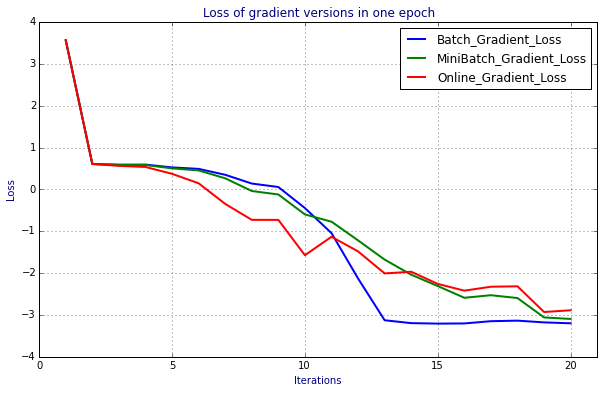

In [578]:
it = np.arange(1,ITER+1)
ax = plt.axes(xlim=(0,ITER+1))
plt.plot(it,lossBatch,linewidth=2.)
plt.plot(it,lossMini,linewidth=2.)
plt.plot(it,lossOnline,linewidth=2.)
lines = plt.gca().get_lines()
plt.legend(lines,['Batch_Gradient_Loss',\
                  'MiniBatch_Gradient_Loss',\
                  'Online_Gradient_Loss'])
plt.title('Loss of gradient versions in one epoch',color='navy')
plt.xlabel('Iterations',color='navy')
plt.ylabel('Loss',color='navy')
grid(True)
#plt.savefig('plots/lossEpoch.png')

<a id='epoch'></a>
<h3 style="margin-top:2cm"> Interactive graph of the three versions</h3>

In [579]:
TOOLS =[WheelZoomTool(),ResetTool(),PanTool()]

s1 = bp.figure(width=W,plot_height=H,
              title='Loss of gradient versions in one epoch',
              tools=TOOLS)
xs=[it,it,it]
ys=[lossBatch,lossMini,lossOnline]
#s1.multi_line(xs,ys,line_color=['navy','green','red'],line_width=2)
s1.line(it,lossBatch,line_color='navy',legend='Batch_Gradient_Loss',
       line_width=2.)
s1.line(it,lossMini,line_color='green',legend='Mini_Batch_Gradient_Loss',
       line_width=2.)
s1.line(it,lossOnline,line_color='red',legend='Online_Gradient_Loss',
       line_width=2.)
s1.xaxis.axis_label="Iterations/One Epoch"
s1.yaxis.axis_label="Loss"
s1.title_text_font_size='16pt'
s1.yaxis.axis_label_text_font_size='14pt'
s1.xaxis.axis_label_text_font_size='14pt'

bp.show(s1)

<a id='aniepoch'></a>
<h3 style="margin-top:2cm"> Animated plots of loss in one epoch</h3>


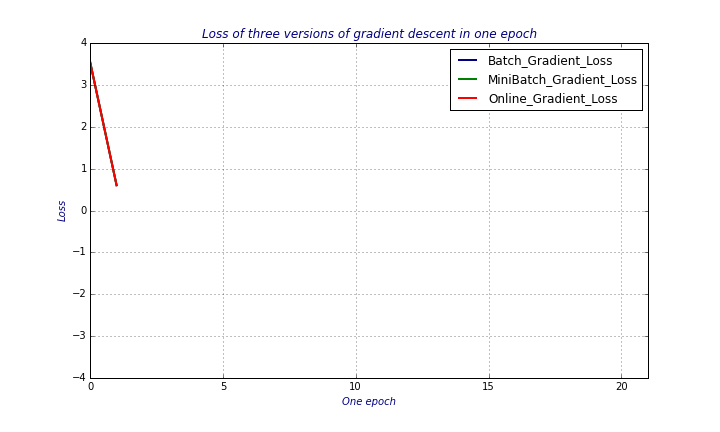
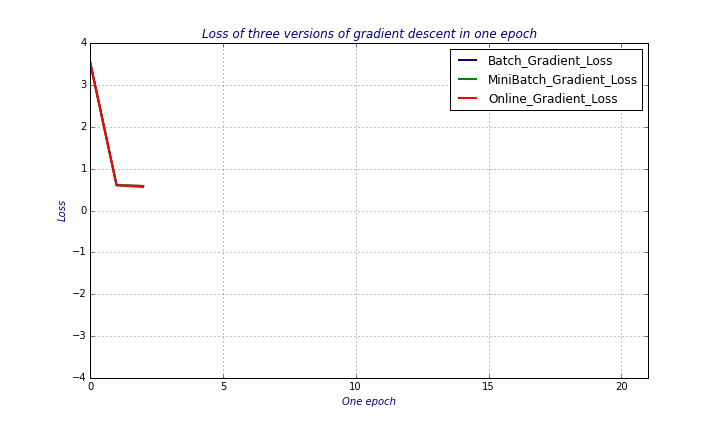
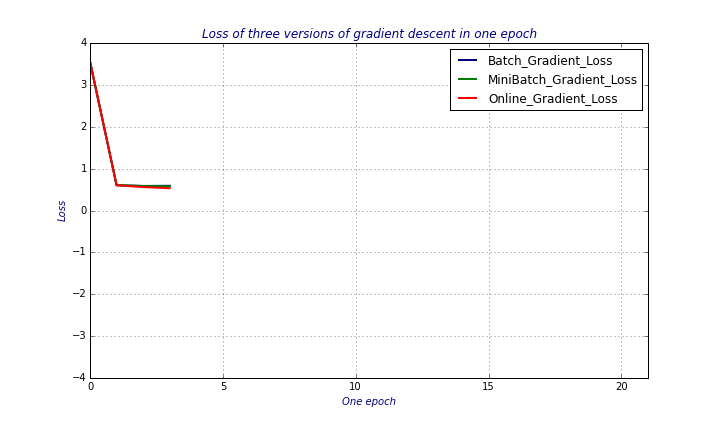
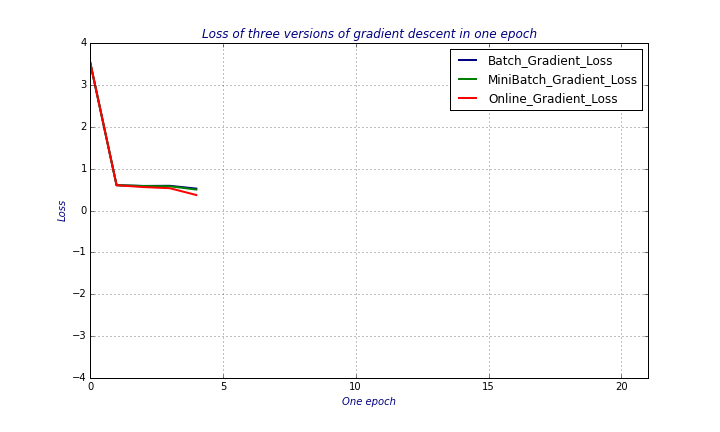
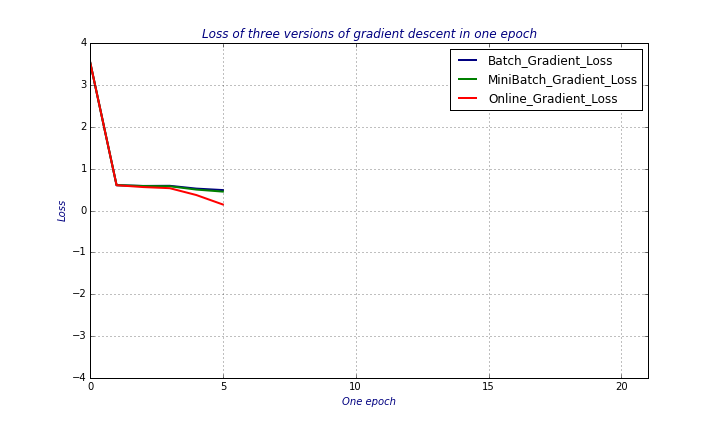
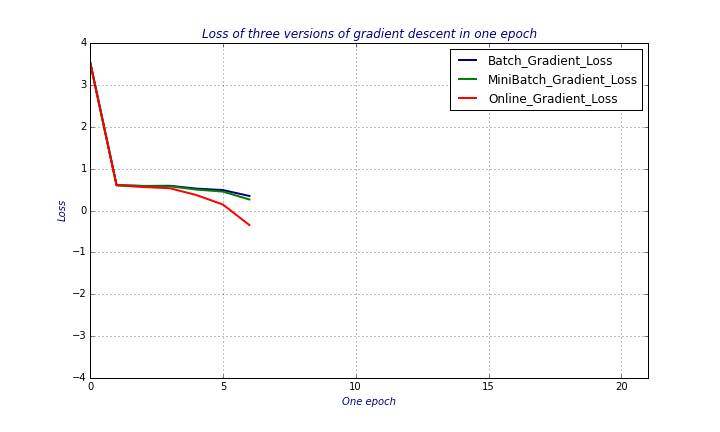
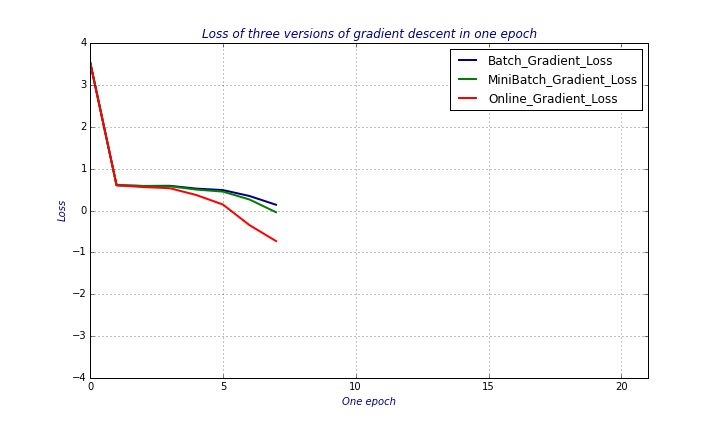
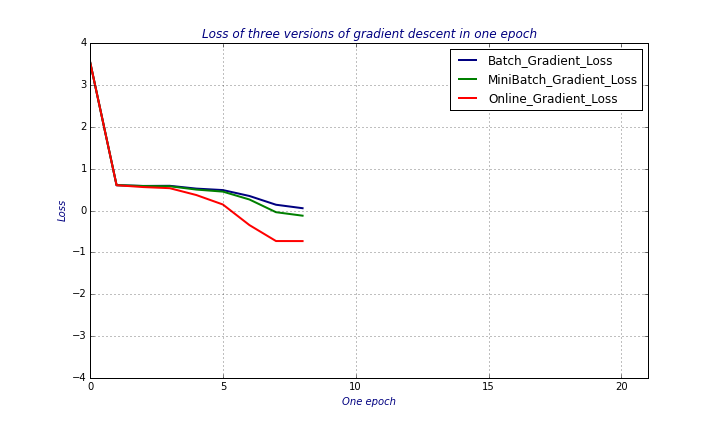
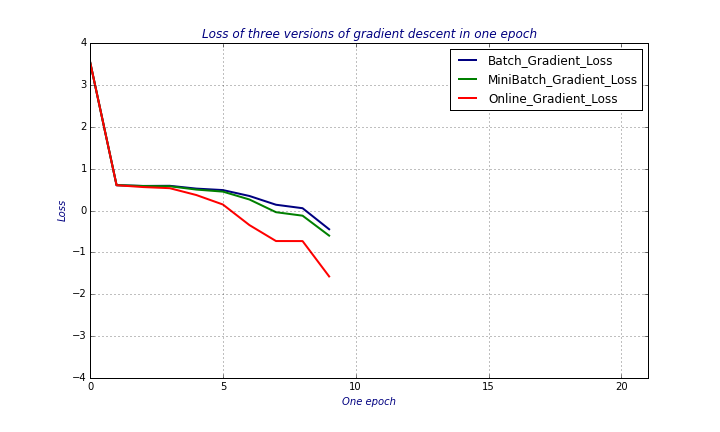
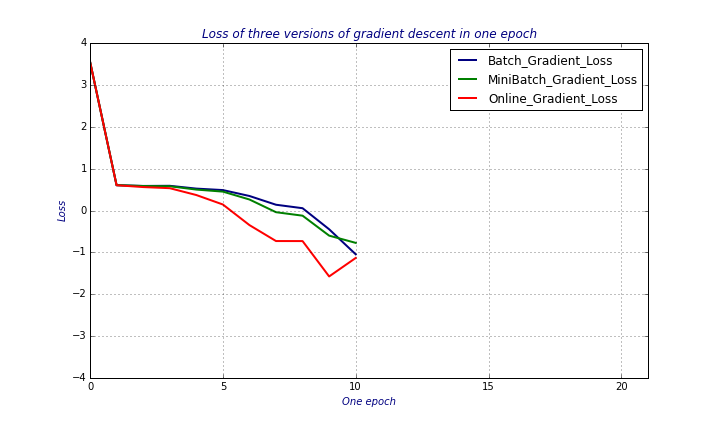
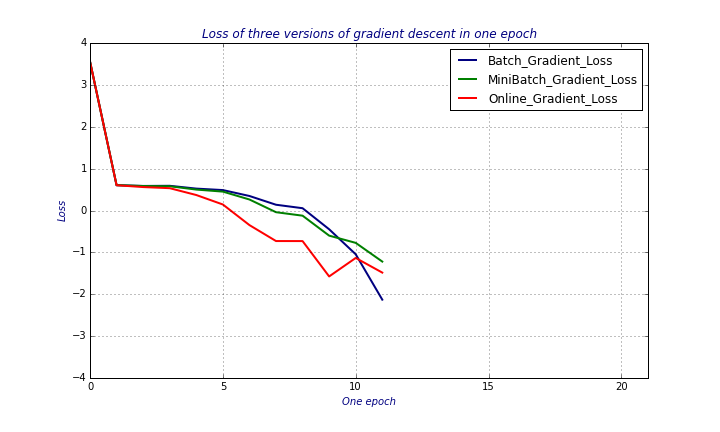
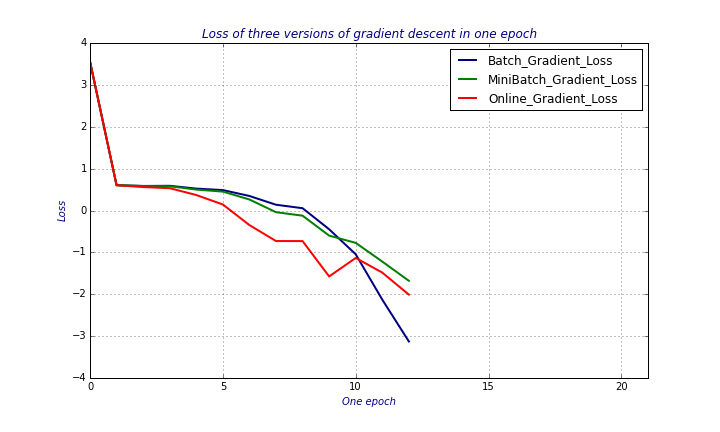
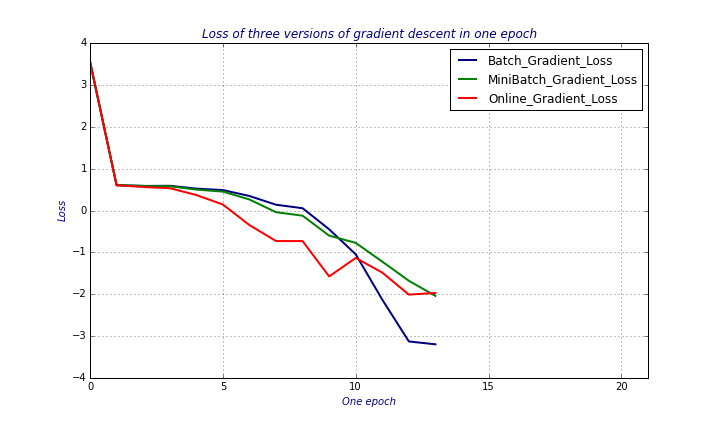
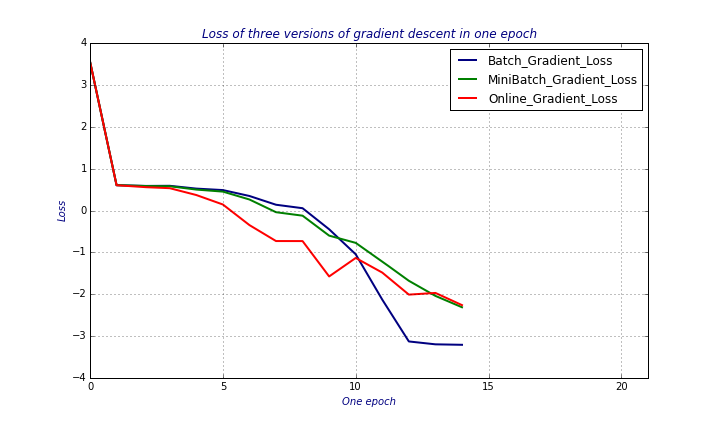
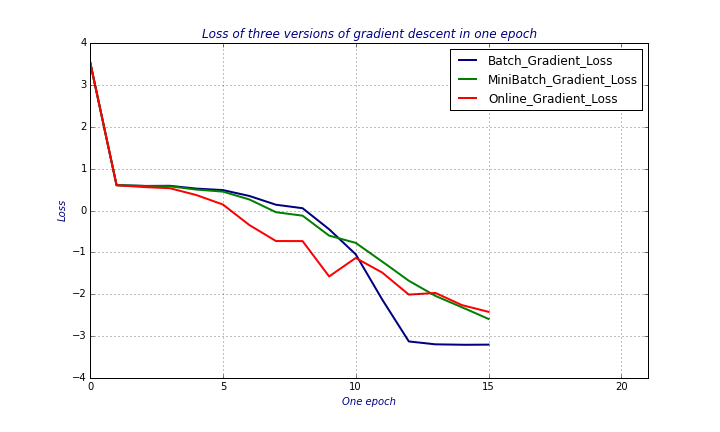
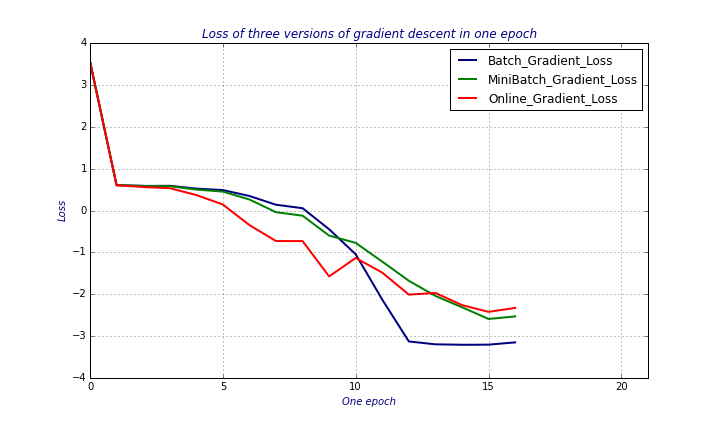
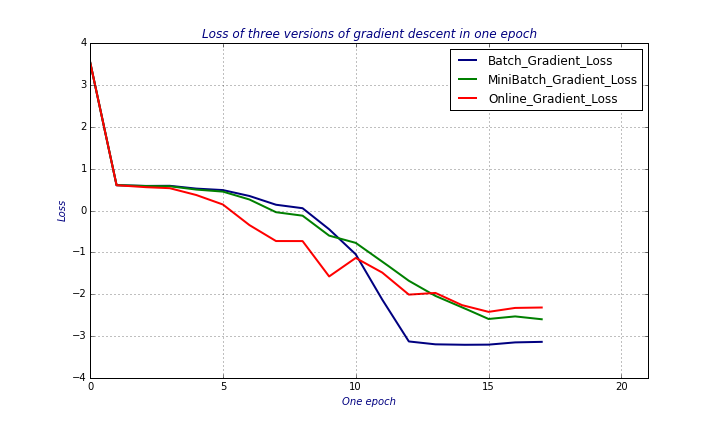
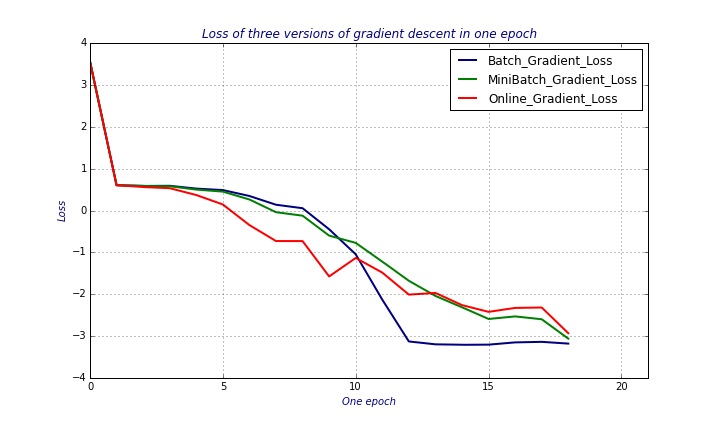
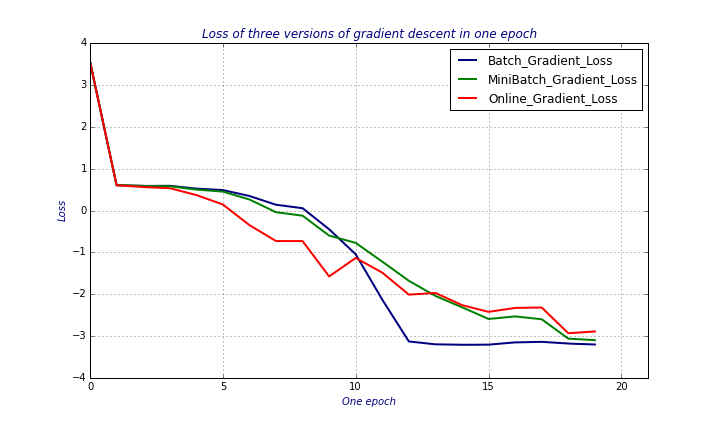

In [580]:
fig = plt.figure()
ax = plt.axes(xlim=(0,ITER+1),ylim=(floor(lossBatch.min()),ceil(lossBatch.max())))
ax.set_color_cycle(['navy','green','red'])
line1,line2,line3, = ax.plot([],[],[],[],[],[],lw=2.)
plt.grid(True)
x,y1,y2,y3 = [],[],[],[]
#number of samples in linear interpolation
plt.legend([line1,line2,line3],['Batch_Gradient_Loss',\
                  'MiniBatch_Gradient_Loss',\
                  'Online_Gradient_Loss'])
plt.title("Loss of three versions of gradient descent in one epoch",color='navy',style='italic')
plt.xlabel("One epoch",color='navy',style='italic')
plt.ylabel("Loss",color='navy',style='italic')
n=10
def init():
    line1.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    return line1,line2,line3,

#lossBatch (y) and iterations(x)
def animate(i):
    x.append(np.linspace(i,i+1,n))
    y1.append(np.linspace(lossBatch[i],lossBatch[i+1],n))
    y2.append(np.linspace(lossMini[i],lossMini[i+1],n))
    y3.append(np.linspace(lossOnline[i],lossOnline[i+1],n))
    line1.set_data(x,y1)
    line2.set_data(x,y2)
    line3.set_data(x,y3)
    return line1,line2,line3,

animation.FuncAnimation(fig,animate,np.arange(0,len(it)-1),
                        init_func=init,
                        interval=200,blit=True,repeat=False)

<a id="exB"></a>
<center> <h2 style="border-top:solid;padding-top:1cm"> Exercise B</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<p style="font-size:large">Here we show the position of the first 10 iterations of the three mathods on the loss function :</p> 
<center>$x^{4}-2x^{2}+2x$</center>
<p style="font-size:large">The starting point of the methods was chosen to be at 1.5</p>

<a id='batchSteps'></a>
<h3 style="margin-top:2cm"> Animation of first few steps with Batch Gradient Descent</h3>


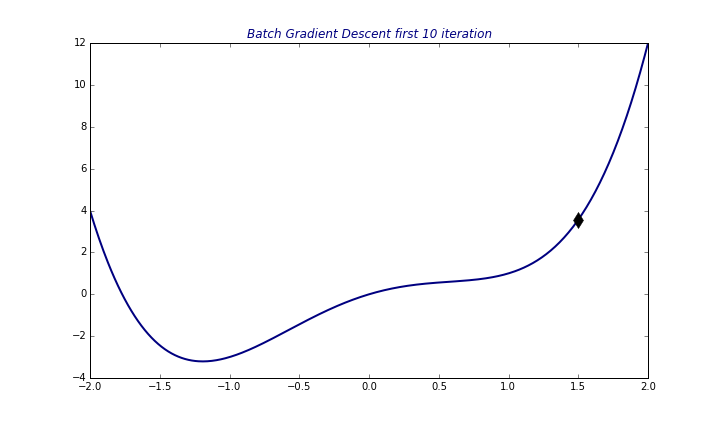
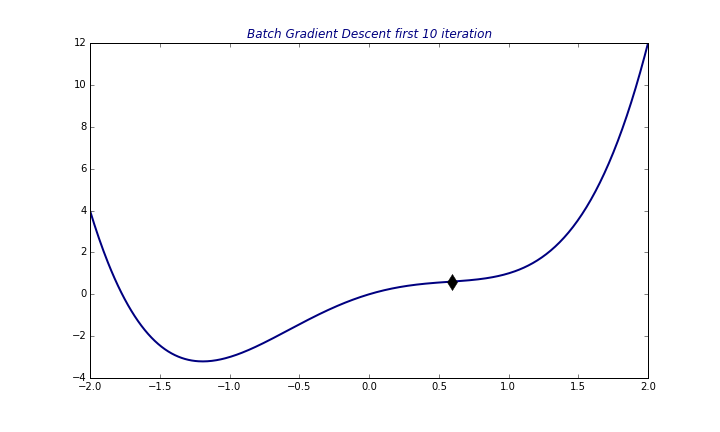
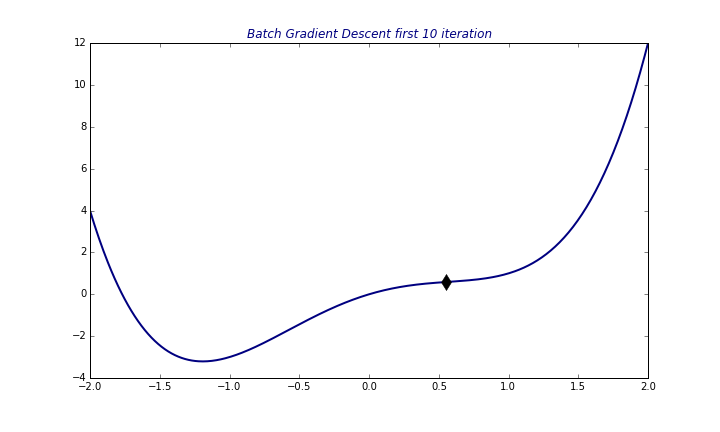
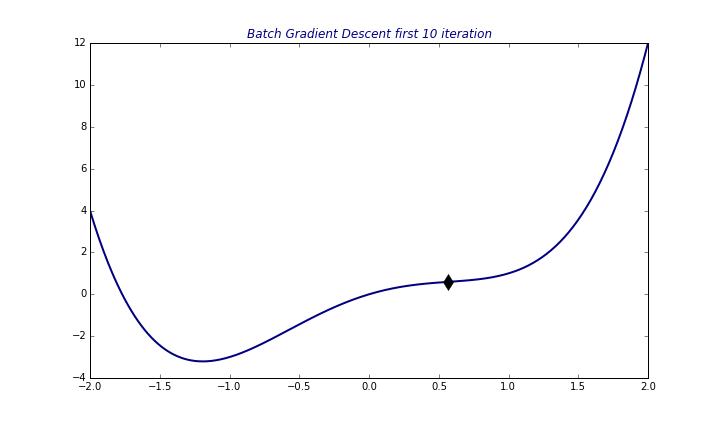
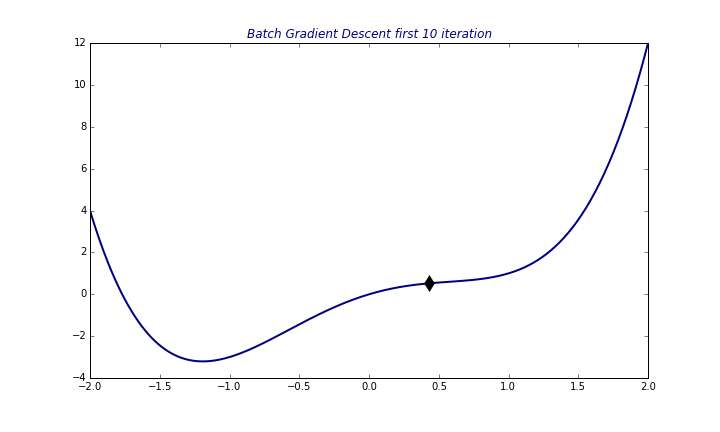
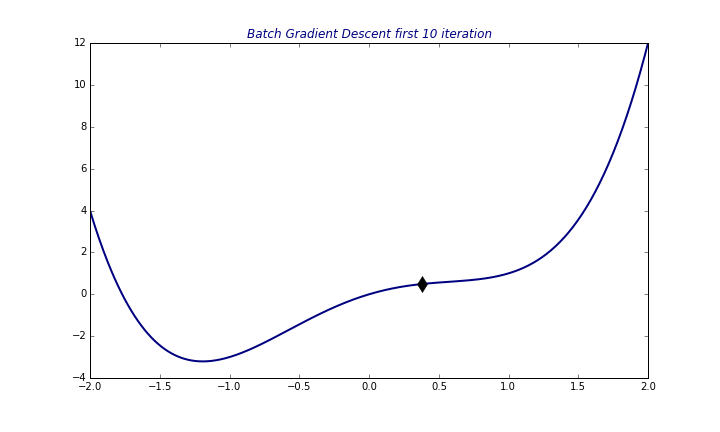
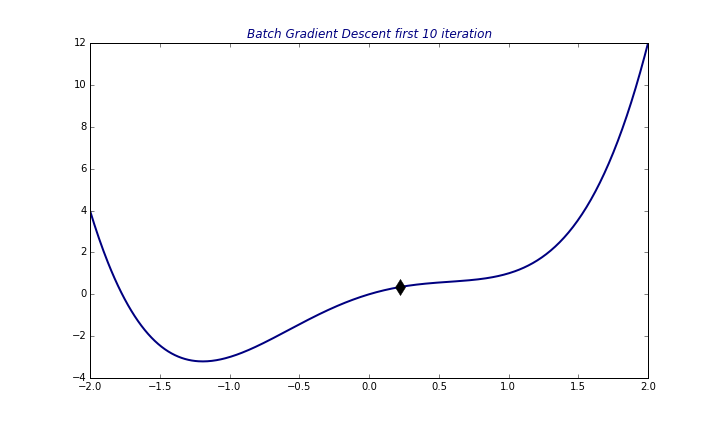
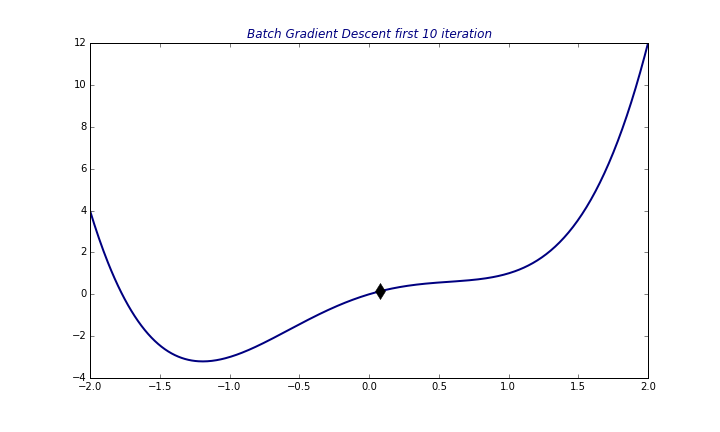
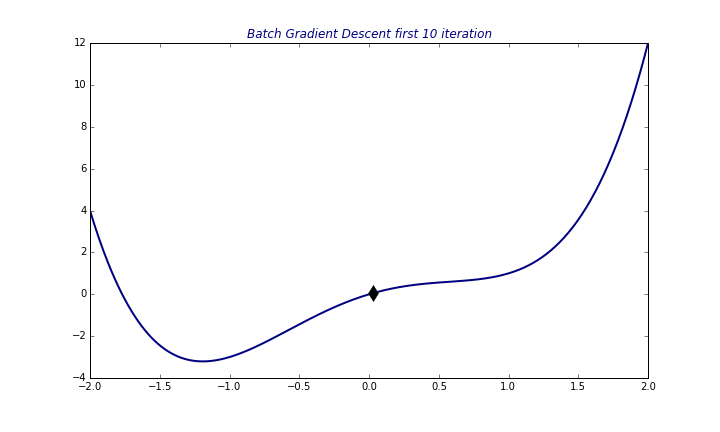
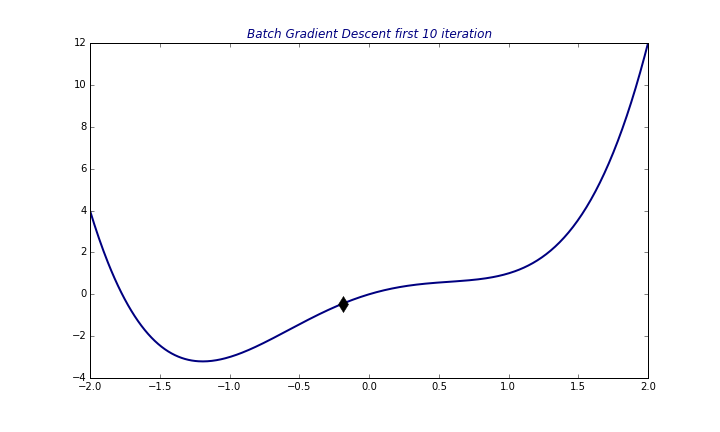
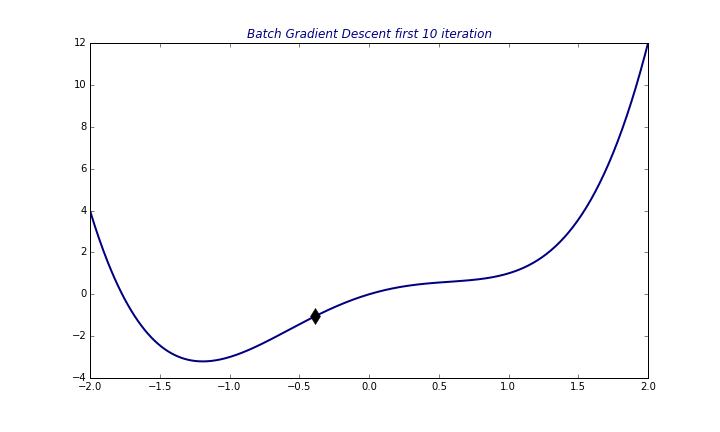
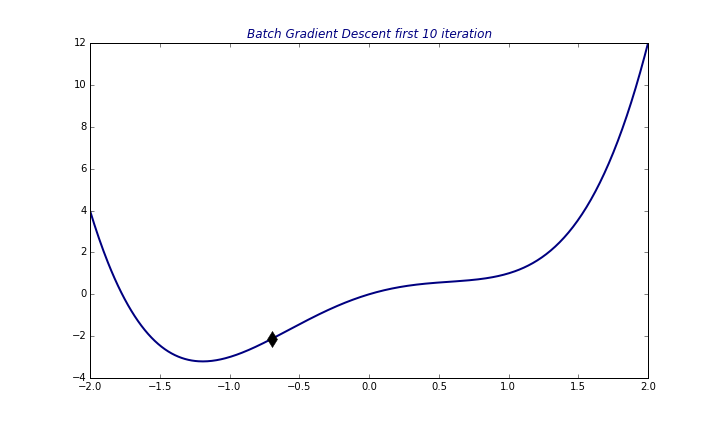
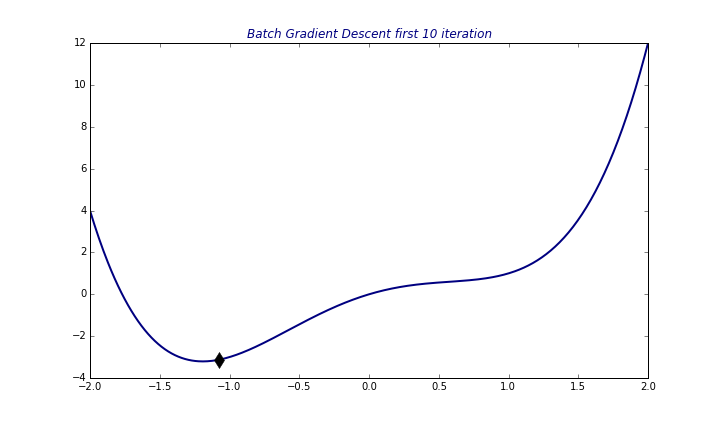
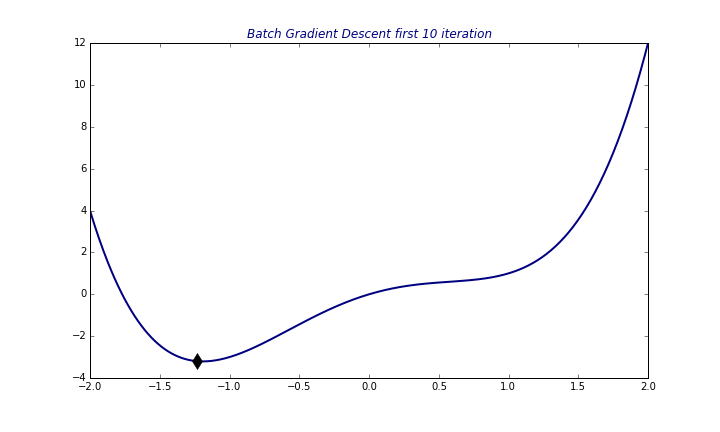
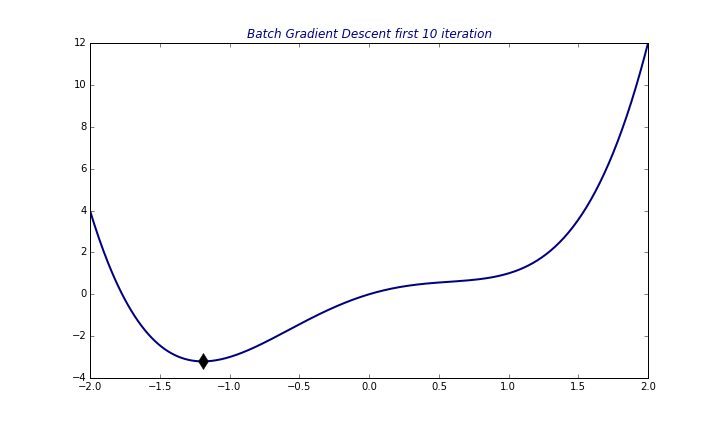
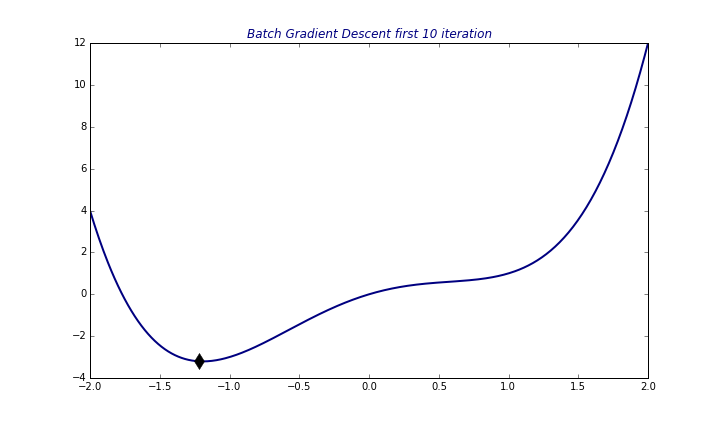
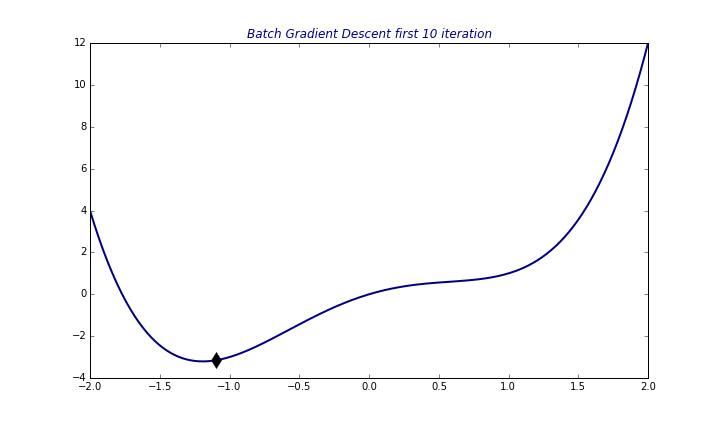
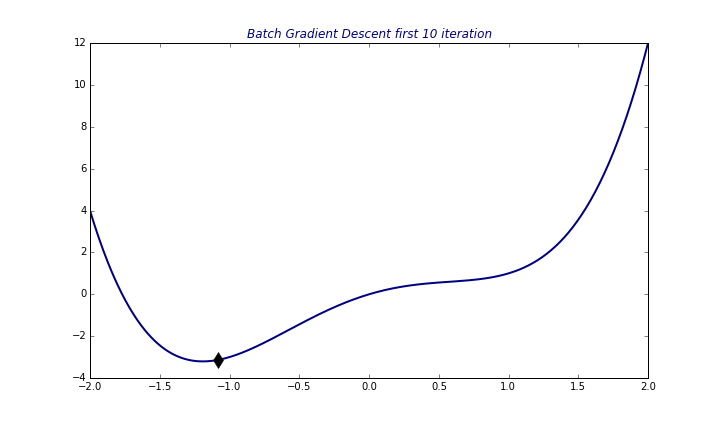
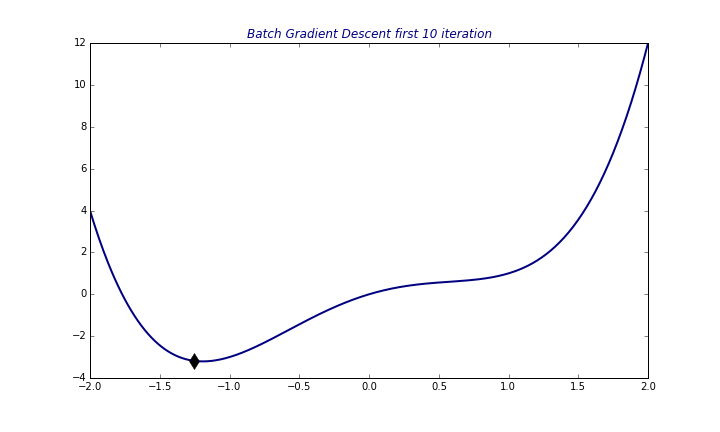
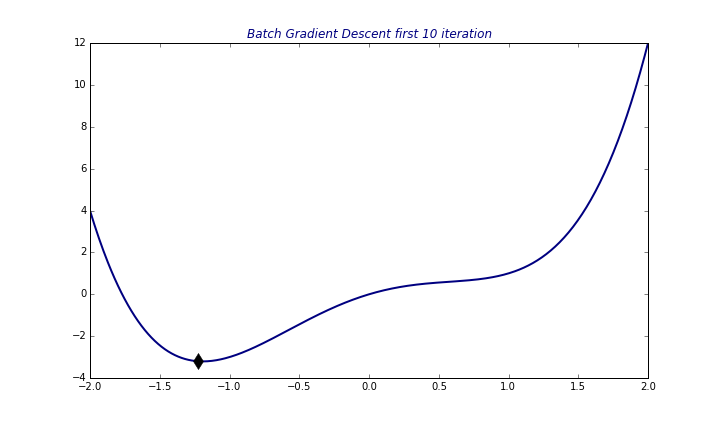

In [393]:
#resBatch,resMini,resOnline
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=5,metadata=dict(artist="GregAfen"),bitrate=1800)
# Data for the loss function on which we draw the steps
x = np.linspace(-2.,2.,500)
y = x**4 - 2*x**2 + 2*x

def init():
    line.set_data([],[])
    return line,

def animate(i):
    x_n = meanResBatch[i]
    y_n = lossFunction(x_n)
    line.set_data(x_n,y_n)
    return line,

fig = plt.figure()
ax = plt.axes(xlim=(-2,2),ylim=(-4,12))
ax.plot(x,y,linewidth=2.,color='navy')
plt.title("Batch Gradient Descent first 10 iteration",color='navy',style='italic')
line, = ax.plot([],[],"d",markersize=12,color='black')

#ani1 = 
animation.FuncAnimation(fig,animate,init_func=init,
                       frames=ITER,interval=300)
#ani1.save('batchAni.mp4',writer=writer)

<a id='miniSteps'></a>
<h3 style="margin-top:2cm"> Animation of first few steps with Mini Batch Gradient Descent</h3>


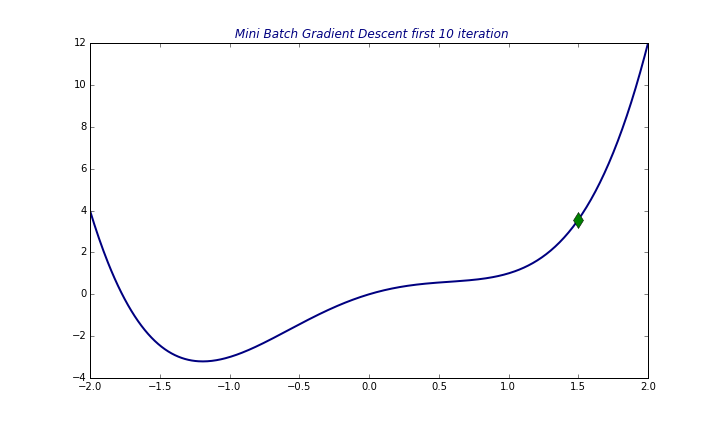
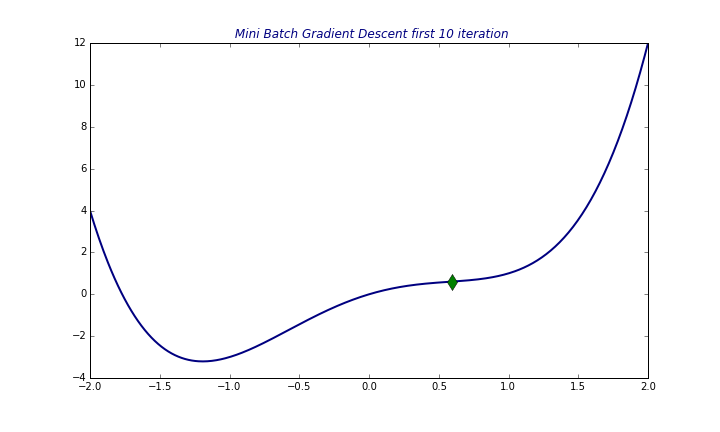
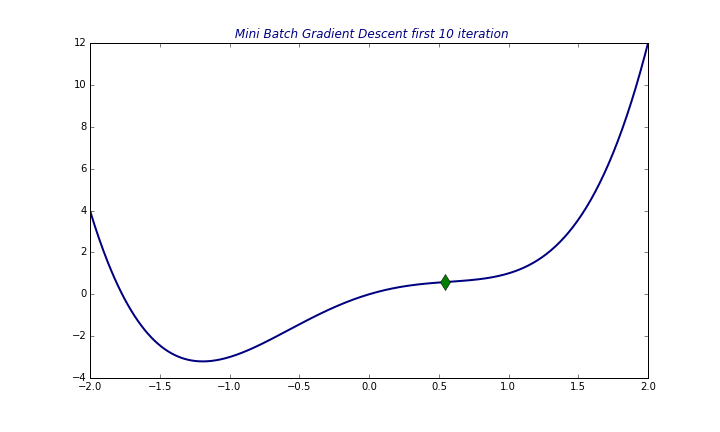
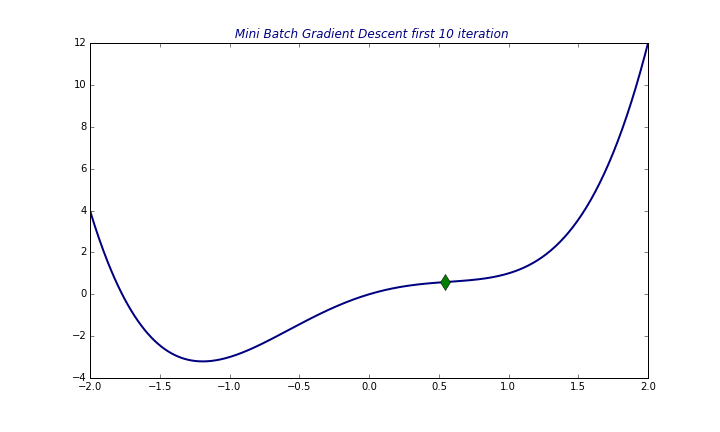
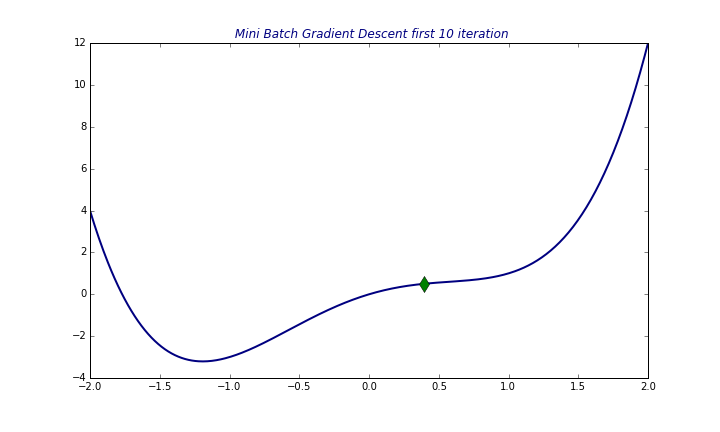
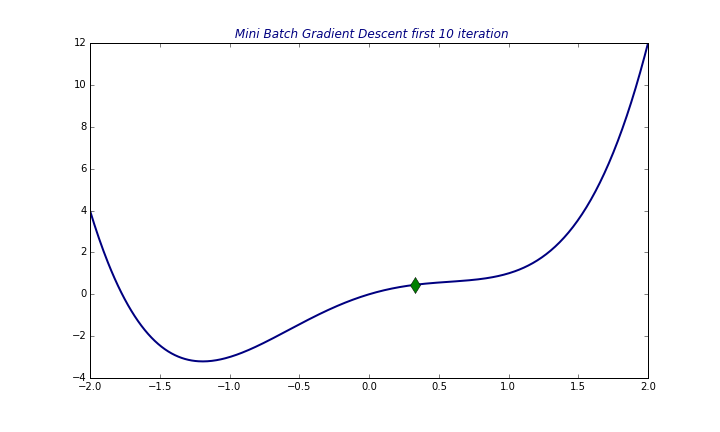
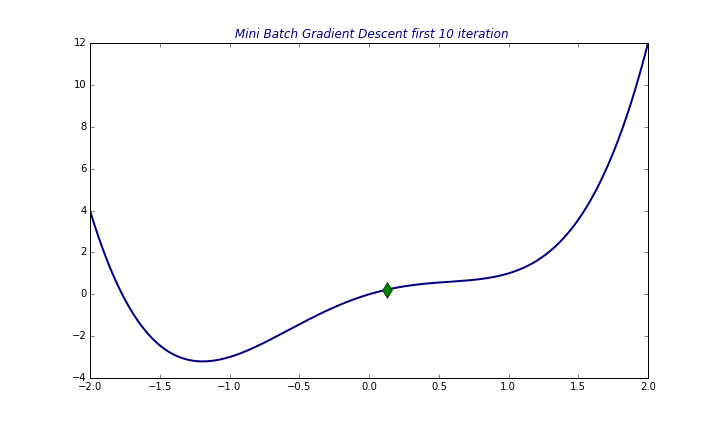
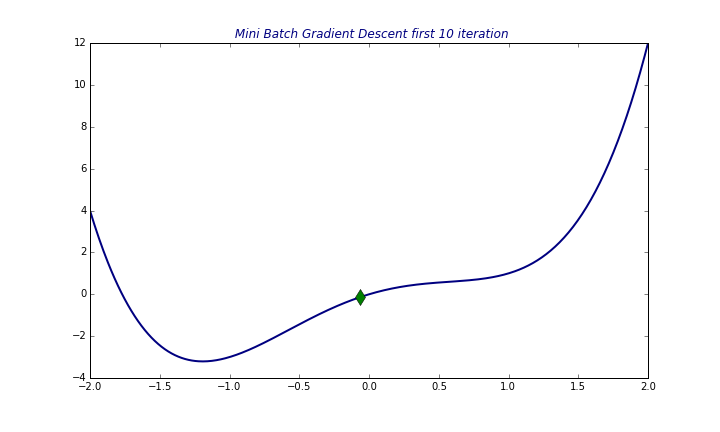
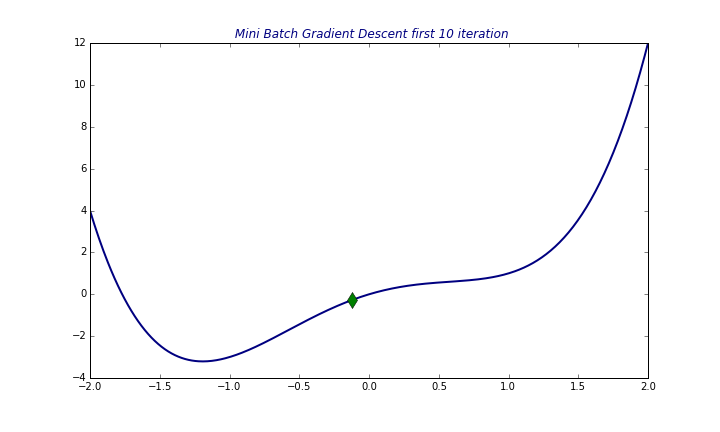
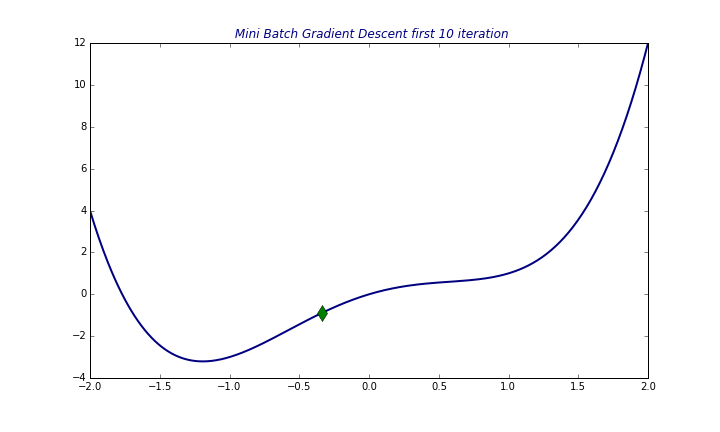
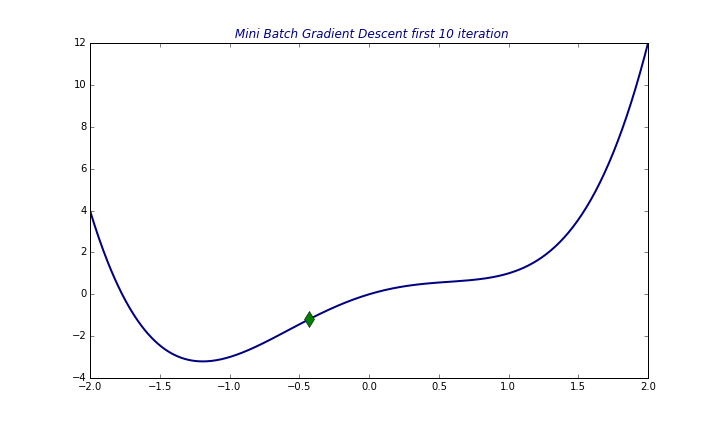
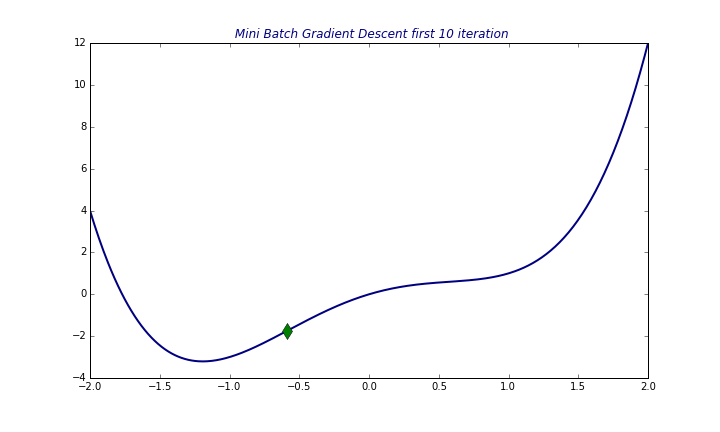
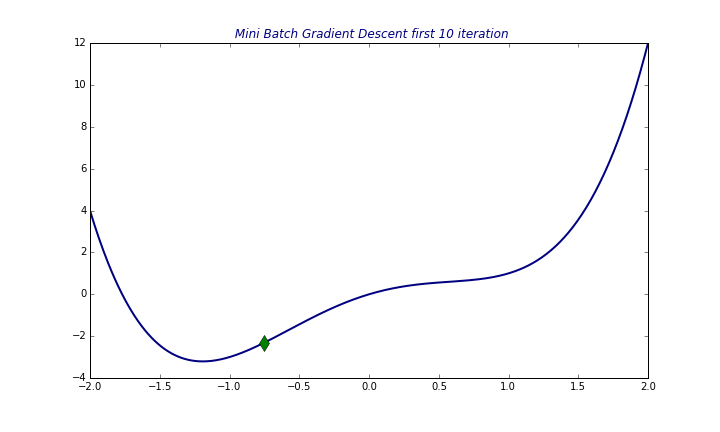
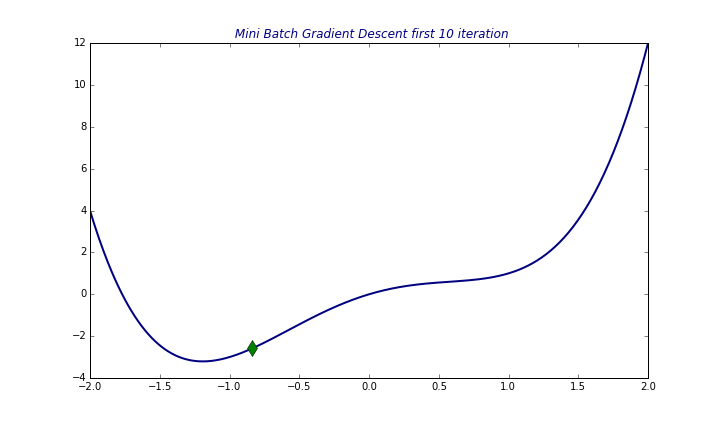
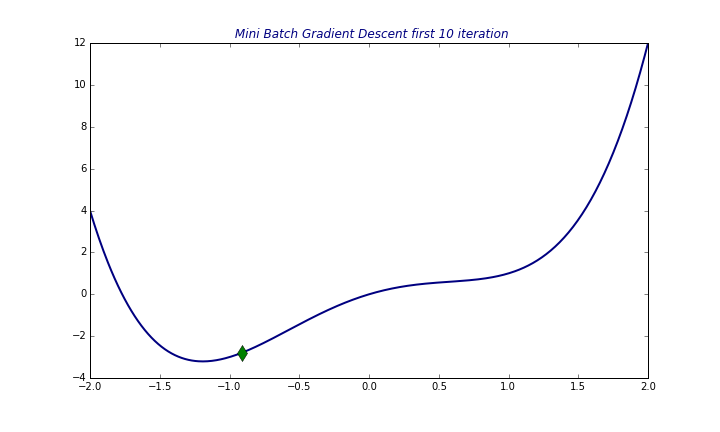
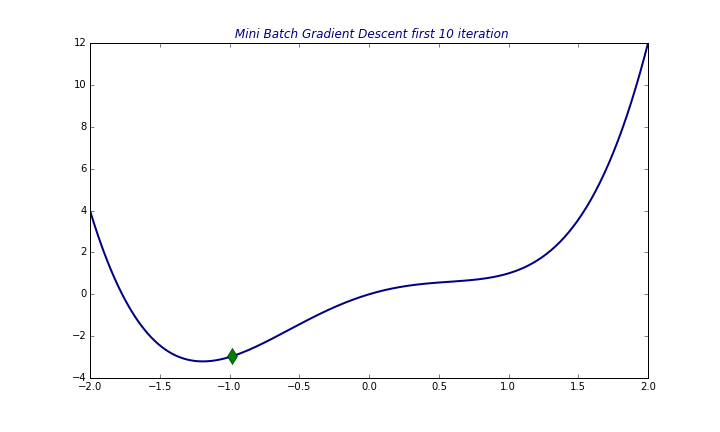
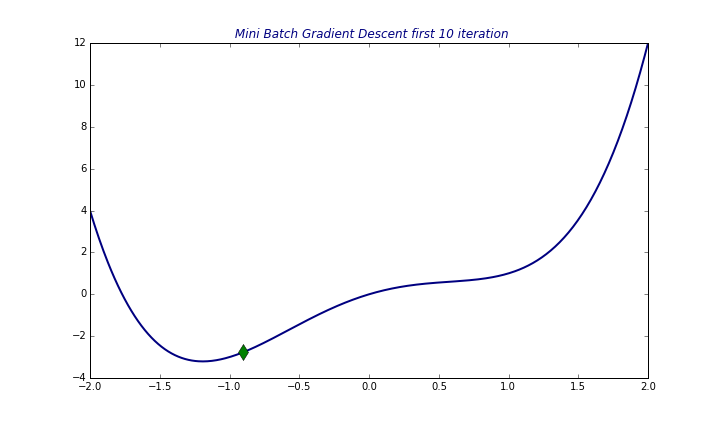
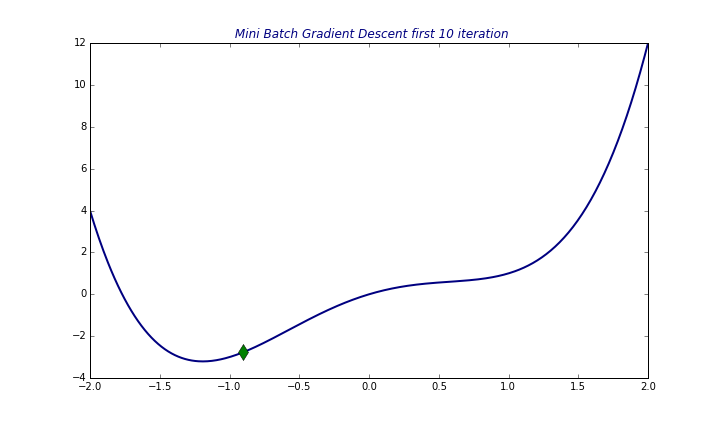
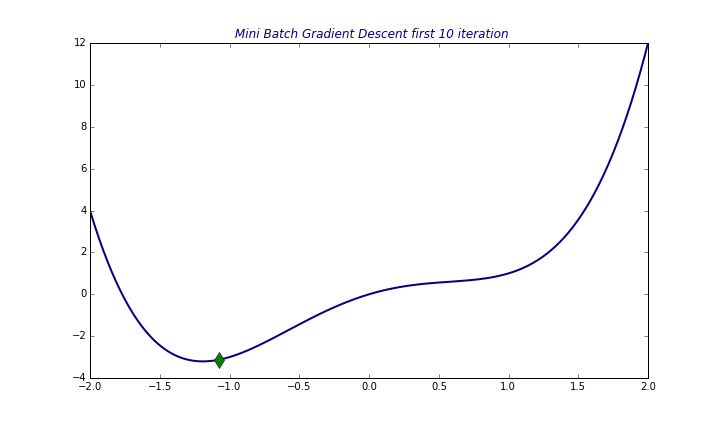
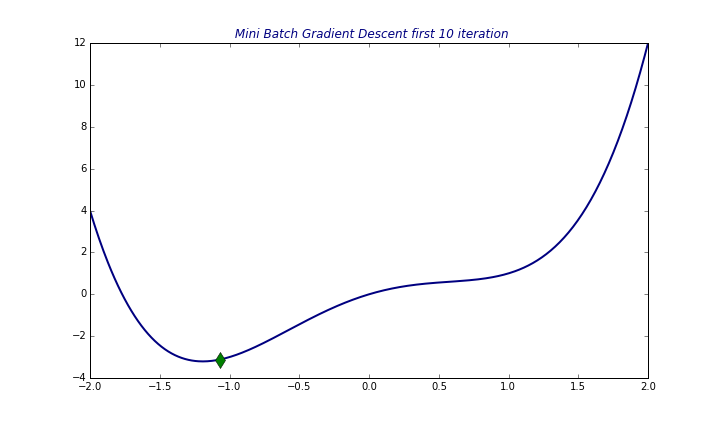

In [394]:
#resBatch,resMini,resOnline
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=5,metadata=dict(artist="GregAfen"),bitrate=1800)
# Data for the loss function on which we draw the steps
x = np.linspace(-2.,2.,500)
y = x**4 - 2*x**2 + 2*x

def lossFunction(point):
    return point**4-2*point**2+2*point

def init():
    line.set_data([],[])
    return line,

def animate(i):
    x_n = meanResMini[i]
    y_n = lossFunction(x_n)
    line.set_data(x_n,y_n)
    return line,

fig = plt.figure()
ax = plt.axes(xlim=(-2,2),ylim=(-4,12))
ax.plot(x,y,linewidth=2.,color='navy')
plt.title(" Mini Batch Gradient Descent first 10 iteration",color='navy',style='italic')
line, = ax.plot([],[],"d",markersize=12,color='green')

#ani2 = 
animation.FuncAnimation(fig,animate,init_func=init,
                       frames=ITER,interval=300)
#ani2.save('MiniBatchAni.mp4',writer=writer)

<a id='onlineSteps'></a>
<h3 style="margin-top:2cm"> Animation of first few steps with Stochastic Gradient Descent</h3>


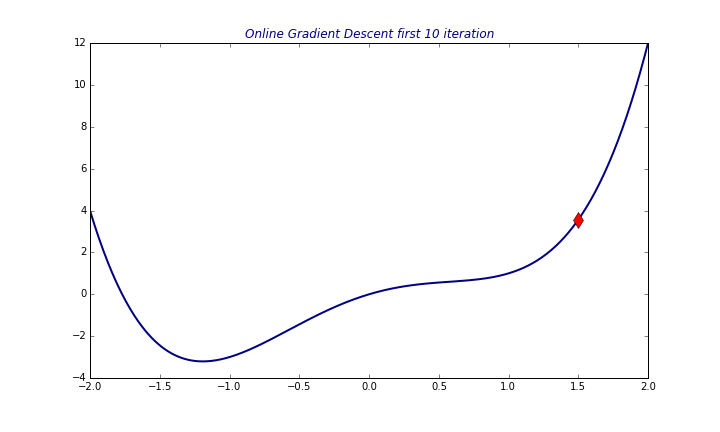
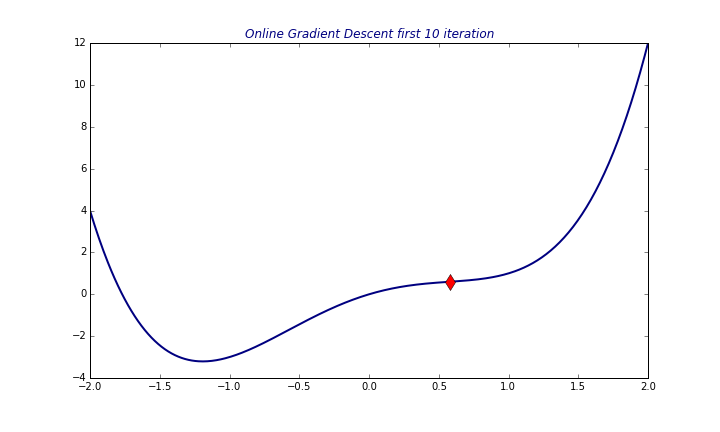
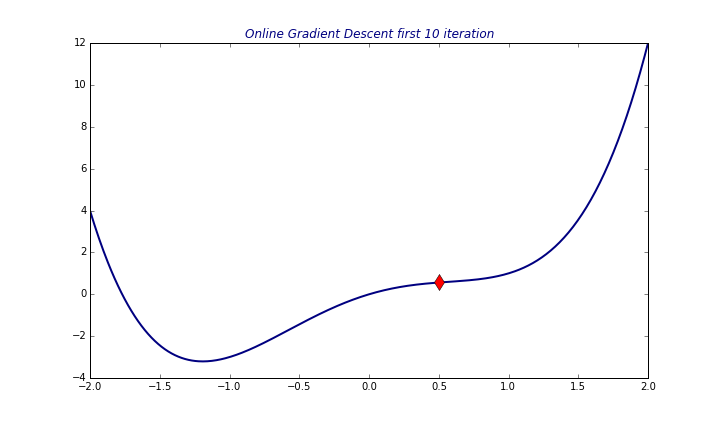
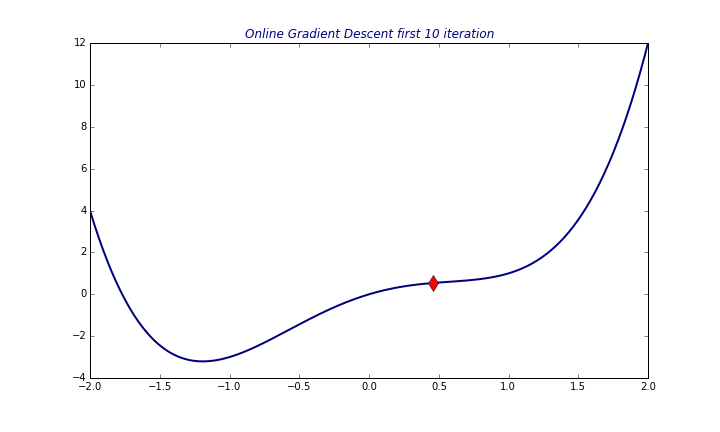
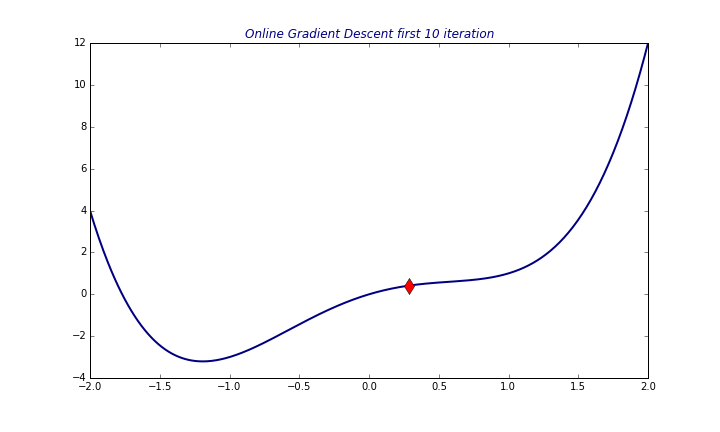
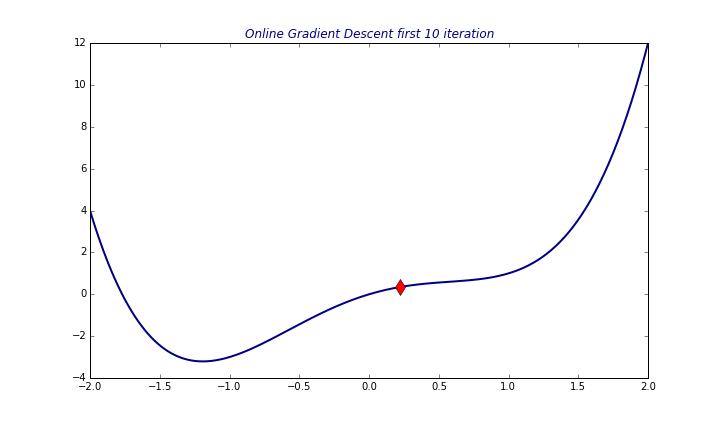
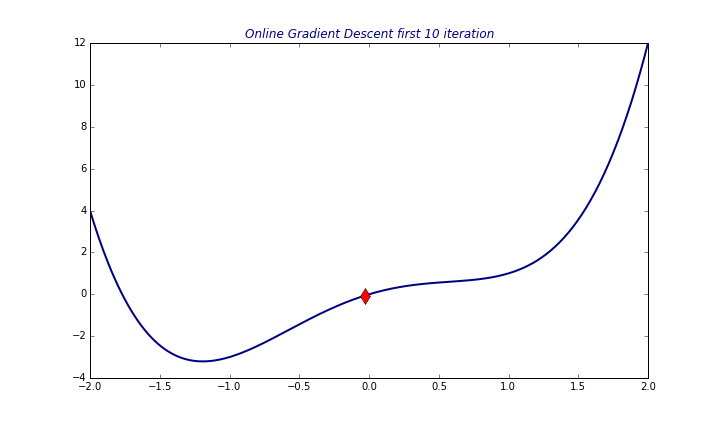
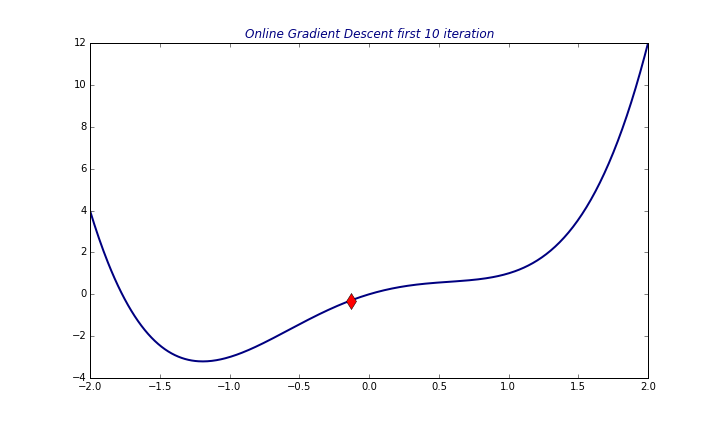
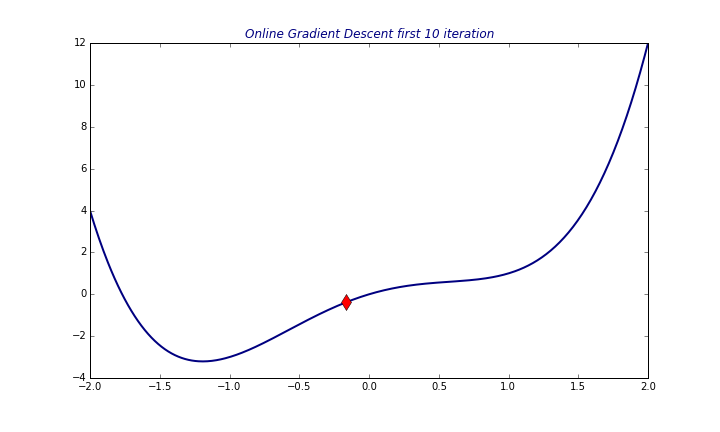
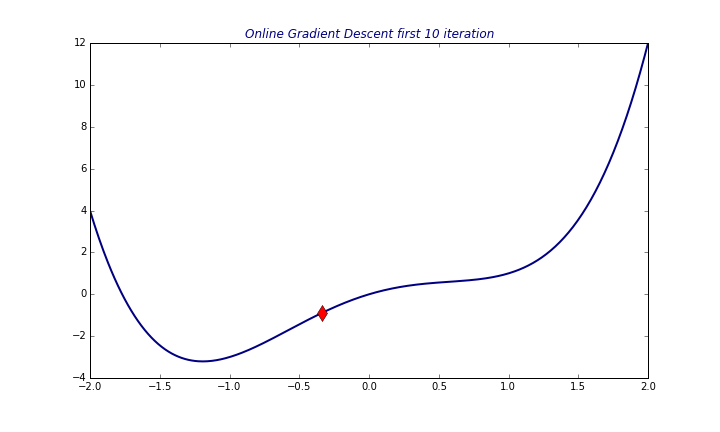
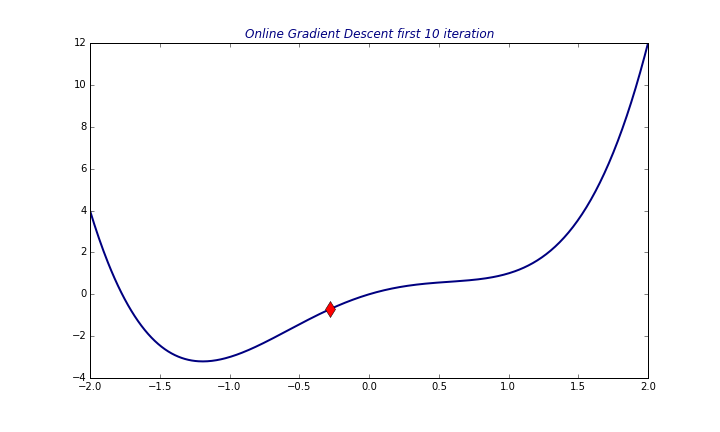
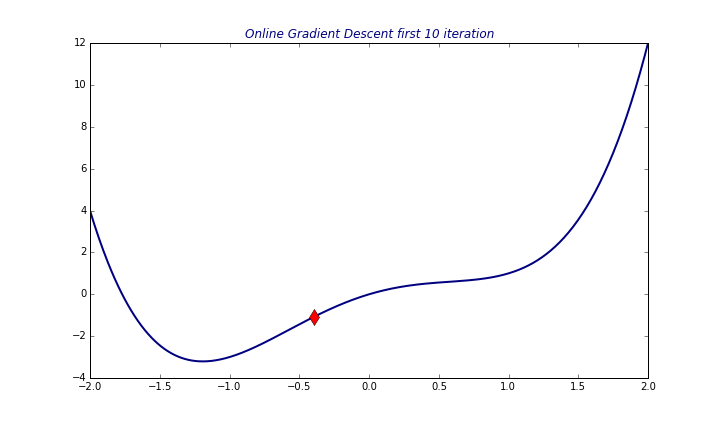
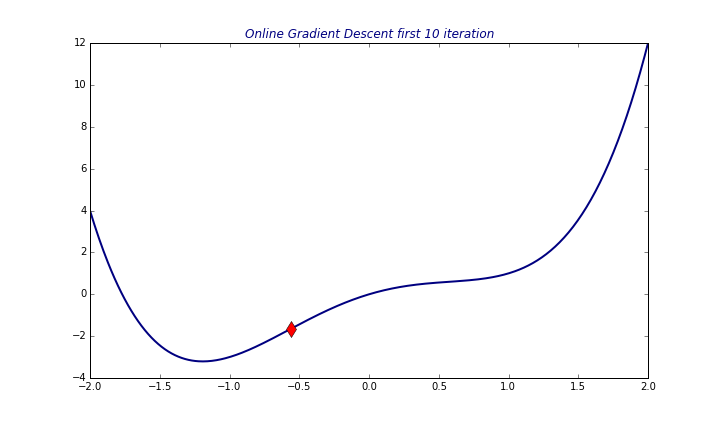
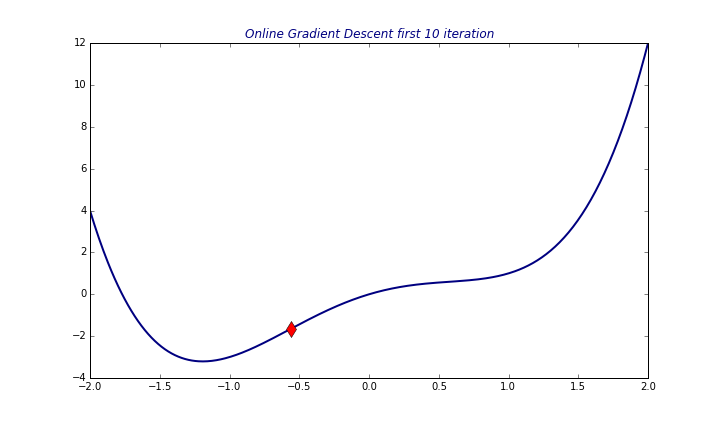
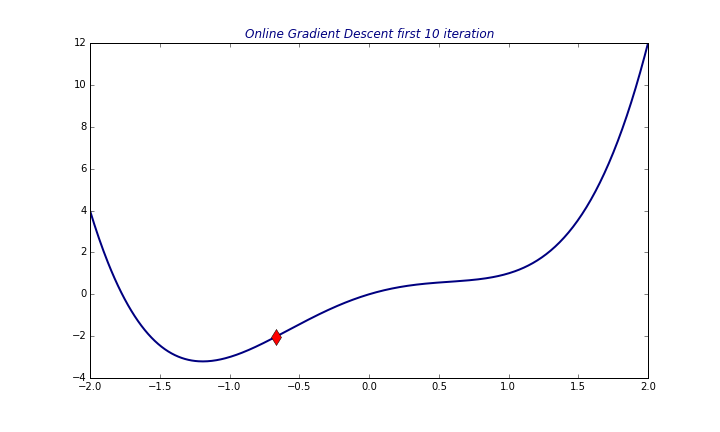
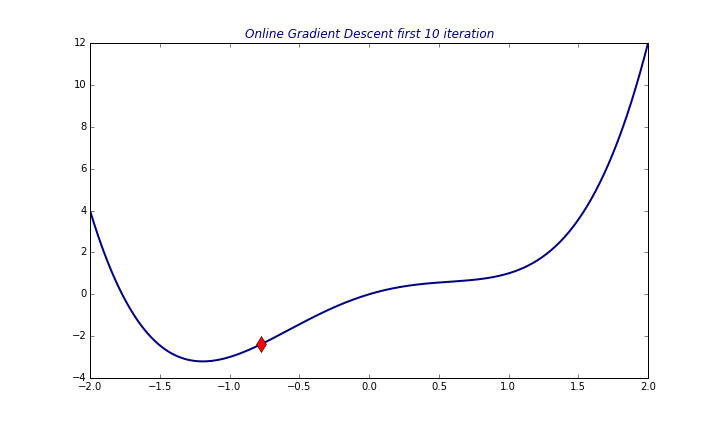
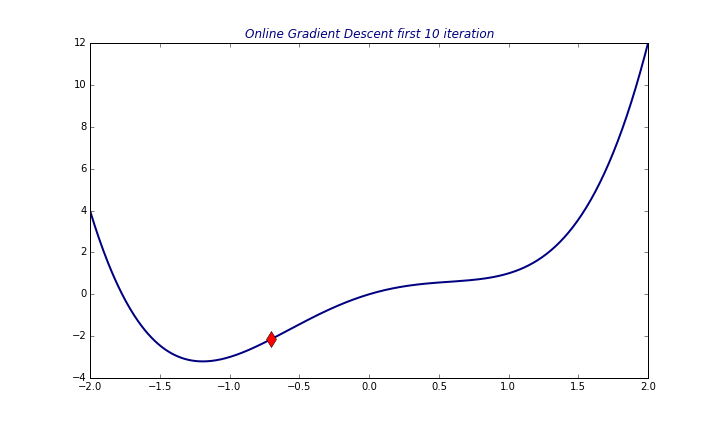
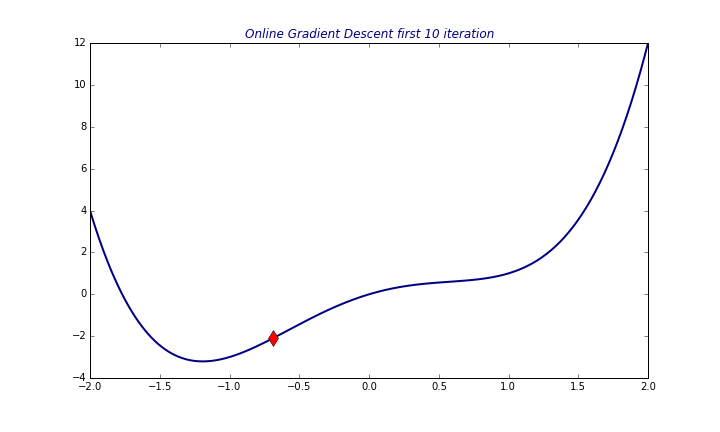
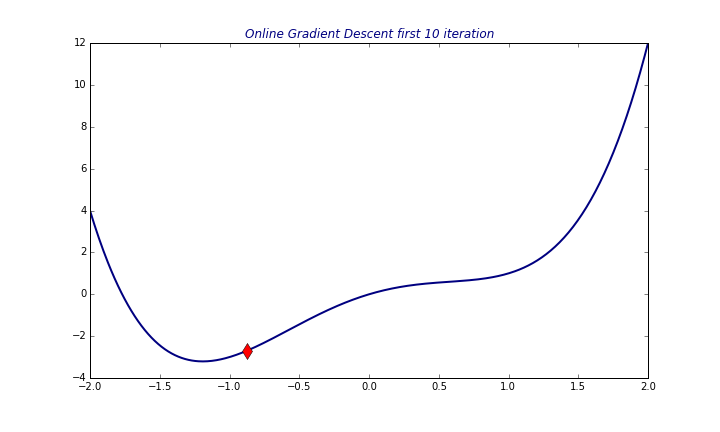
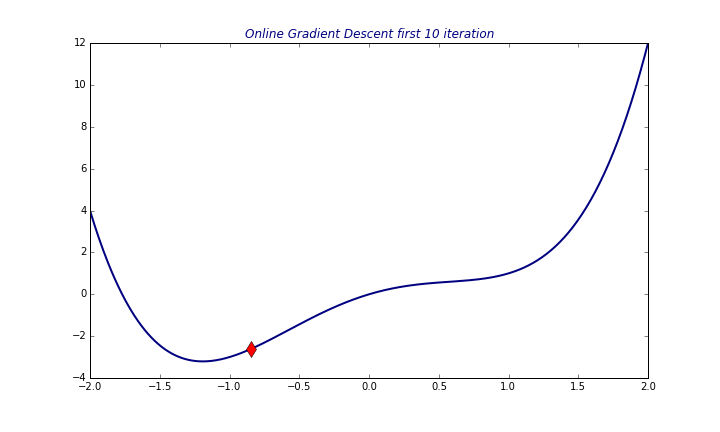

In [395]:
#resBatch,resMini,resOnline
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=5,metadata=dict(artist="GregAfen"),bitrate=1800)
# Data for the loss function on which we draw the steps
x = np.linspace(-2.,2.,500)
y = x**4 - 2*x**2 + 2*x

def lossFunction(point):
    return point**4-2*point**2+2*point

def init():
    line.set_data([],[])
    return line,

def animate(i):
    x_n = meanResOnline[i]
    y_n = lossFunction(x_n)
    line.set_data(x_n,y_n)
    return line,

fig = plt.figure()
ax = plt.axes(xlim=(-2,2),ylim=(-4,12))
ax.plot(x,y,linewidth=2.,color='navy')
plt.title("Online Gradient Descent first 10 iteration",color='navy',style='italic')
line, = ax.plot([],[],"d",markersize=12,color='red')

#ani3 = 
animation.FuncAnimation(fig,animate,init_func=init,
                       frames=ITER,interval=300)
#ani3.save('plots/OnlineAni.mp4',writer=writer)

<a id="exC"></a>
<center> <h2 style="border-top:solid;padding-top:1cm"> Exercise C</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<p style="font-size:large">We calculate the computation time with respect to the loss for different values of K for the mini batch gradient descent method</p> 

In [382]:
ITERL = 20
SAMPL = 10000000
#largeGaussianNoise = genStaticGaussianNoise(ITERL,SAMPL)
kapas=[1,100,1000,10000,1000000,10000000]
time_steps = np.zeros((6,20))
gradRes = np.zeros((6,20))
def timedGetGrad(p,n,iteration):
    v = 4*p**3-4*p+2
    arr = np.ones(n)*v
    noise = largeGaussianNoise[iteration]
    return arr+noise

def timedMiniBatchGradientDescent(init,sampleSize,iterations,vk,
                             learningRate=0.1,batch=1):
    ws = np.zeros(iterations)
    ws[0] = init
    for i in range(iterations-1):
        ### START TIMING SECTION ###
        start = time.time()
        grads = timedGetGrad(ws[i],sampleSize,i)
        ch = np.random.choice(grads,size=batch)
        ws[i+1] = ws[i] - learningRate*ch.mean()
        time_steps[vk,i]=(time.time()-start)
        ### END TIMING SECTION ###
    return ws

for k in range(0,6):
    gradRes[k] = timedMiniBatchGradientDescent(1.5,SAMPL,ITERL,k,learningRate=.1,batch=kapas[k])


#tResBatch = timedMiniBatchGradientDescent(1.5,SAMPL,ITERL,learningRate=.1,batch=1)
#tLossOnline = vLossFunction(tResBatch)
#timeCumulativeOnline = [sum(time_steps_on[0:i]) for i in range(1,len(time_steps_on)+1) ]

In [383]:
time_steps = time_steps[:,:-1]

Computation time for k = 1

[ 0.10747313  0.21164227  0.30450034  0.3964963   0.49163437  0.58200336
  0.6747663   0.76383924  0.8572762   0.94742107  1.04275107  1.13494897
  1.22737193  1.3178091   1.41096306  1.50347209  1.59683013  1.68660307
  1.77866817]
Computation time for k = 100

[ 0.08846784  0.17971468  0.27364779  0.36718774  0.46209168  0.55606771
  0.6472857   0.74262047  0.83610439  0.92770243  1.01891446  1.11242247
  1.20618534  1.29755616  1.38890028  1.48142242  1.57531953  1.6671567
  1.7779758 ]
Computation time for k = 1000

[ 0.10964894  0.20262003  0.30098724  0.40005517  0.50832319  0.6075232
  0.70455813  0.79858518  0.89228511  1.00386715  1.09659195  1.189574
  1.28766394  1.410707    1.49713206  1.57991815  1.66569018  1.74615026
  1.82838535]
Computation time for k = 10000

[ 0.08665991  0.18677378  0.27781582  0.3693068   0.46149182  0.55193472
  0.64713264  0.73819947  0.83371043  0.92344546  1.01621652  1.11115265
  1.20420861  1.29462862  1.3867507   

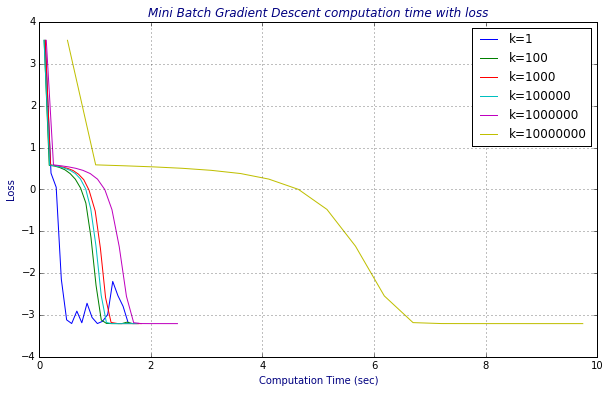

In [385]:
time_steps_cum = zeros((6,19))

for k in range(0,6):
    time_steps_cum[k] = [sum(time_steps[k][0:i]) for i in range(1,len(time_steps[k])+1)]
    print('Computation time for k = %d\n'%kapas[k])
    print(time_steps_cum[k])
    plt.plot(time_steps_cum[k],vLossFunction(gradRes[k][:-1]))
ax = plt.axes()
lines = ax.get_lines()
plt.legend(lines,['k=1','k=100','k=1000','k=100000','k=1000000','k=10000000'])
plt.title("Mini Batch Gradient Descent computation time with loss",color='navy',style='italic')
plt.xlabel('Computation Time (sec)',color='navy')
plt.ylabel('Loss',color='navy')
plt.grid(True)
plt.savefig('plots/compLoss.png')

In [400]:
z = np.zeros(10000000)
for k in kapas:
    print 'Time for randomly chosing %d elements'%k
    %timeit np.random.choice(z,size=k)
    print 'Time for calculating their mean'
    choice = np.random.choice(z,size=k)
    %timeit choice.mean()
    print '\n\n'

Time for randomly chosing 1 elements
The slowest run took 10.15 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.07 µs per loop
Time for calculating their mean
The slowest run took 6.20 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.77 µs per loop



Time for randomly chosing 100 elements
The slowest run took 6.60 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 12.8 µs per loop
Time for calculating their mean
The slowest run took 4.90 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.71 µs per loop



Time for randomly chosing 1000 elements
10000 loops, best of 3: 44.1 µs per loop
Time for calculating their mean
The slowest run took 4.16 times longer than the fastest. This could mean that an intermediate result

<a id="exD"></a>
<center> <h2 style="border-top:solid;padding-top:1cm"> Exercise D</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<p style="font-size:large">We will study the effect of mini batch size on the convergence</p> 

In [596]:
#An upper bound of iterations for the convergence
#And a big enough number of samples to test various
#Mini batch sizes
ITER = 1000
SAMP = 100
#Generation of the gaussian noise
gN = genStaticGaussianNoise(ITER,SAMP)

In [644]:
convergence=[]

def getGrad(p,n,iteration):
    v = 4*p**3-4*p+2
    arr = np.ones(n)*v
    noise = gN[iteration]
    return arr+noise

def conMiniBatchGradientDescent(init,sampleSize,iterations,
                             learningRate=0.1,batch=1):
    ws = [init]
    i=0
    while i<ITER:
        grads = getGrad(ws[i],sampleSize,i)
        ch = np.random.choice(grads,replace=False,size=batch)
        ws.append(ws[i] - learningRate*ch.mean())
        conv = abs(ws[i+1]-ws[i])
        convergence.append(conv)
        i=i+1
        if conv<0.001:
            break
    return ws,i

In [619]:
# batch sizes = 1,25,50,75,100
it_1,it_25,it_50,it_75,it_100 = [],[],[],[],[]

def calcIterations(it_l,b):
    for i in range(0,100):
        _,iterations = conMiniBatchGradientDescent(1.5,SAMP,ITER,learningRate=.1,batch=b)
        it_l.append(iterations)

calcIterations(it_1,1)
calcIterations(it_25,25)
calcIterations(it_50,50)
calcIterations(it_75,75)
calcIterations(it_100,100)


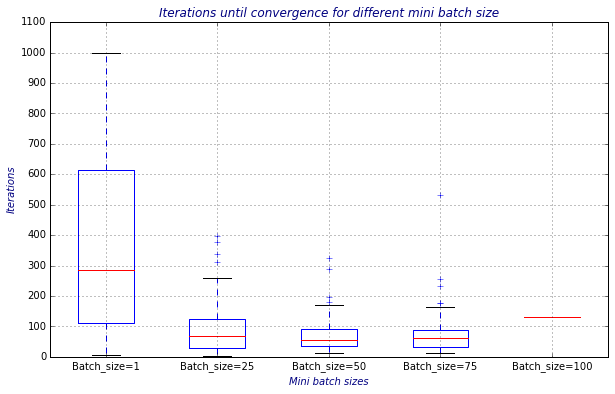

In [647]:
settings = dict(style="italic",color='navy')
data = [it_1,it_25,it_50,it_75,it_100]
plt.figure()
plt.boxplot(data)
plt.xticks(range(1,6),['Batch_size=1','Batch_size=25','Batch_size=50','Batch_size=75','Batch_size=100'])
grid(True)
plt.title("Iterations until convergence for different mini batch size",settings)
plt.ylabel('Iterations',settings)
plt.xlabel('Mini batch sizes',settings)
plt.yticks(np.arange(0,1200,100))
plt.savefig('plots/boxplot.png')

In [639]:
# Comparison of mini batch sizes 25 and 75 on convergence
w1,it1 = conMiniBatchGradientDescent(1.5,SAMP,ITER,learningRate=.1,batch=25)

In [641]:
w2,it2 = conMiniBatchGradientDescent(1.5,SAMP,ITER,learningRate=.1,batch=75)

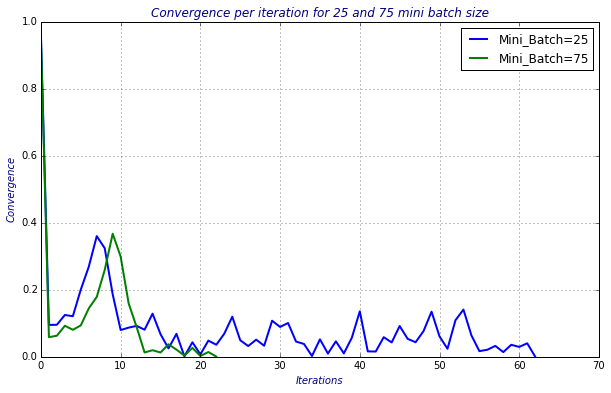

In [648]:
xs25 = np.arange(len(convergence_25))
xs75 = np.arange(len(convergence_75))
lines = plt.plot(xs25,convergence_25,xs75,convergence_75,lw=2.)
grid(True)
plt.legend(lines,['Mini_Batch=25','Mini_Batch=75'])
plt.xlabel('Iterations',settings)
plt.ylabel('Convergence',settings)
plt.title("Convergence per iteration for 25 and 75 mini batch size",settings)
plt.savefig('plots/conMini.png')

<a id="exE"></a>
<center> <h2 style="border-top:solid;padding-top:1cm"> Exercise E</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<p style="font-size:large">We will study the effect of learning rate for stochastic gradient descent</p> 

In [649]:
ITER = 1000
SAMP = 100
gNN = genStaticGaussianNoise(ITER,SAMP)

In [715]:
def getGrad(p,n,iteration,gn):
    v = 4*p**3-4*p+2
    arr = np.ones(n)*v
    noise = gn[iteration]
    return arr+noise
# Another version where you input noise and convergence list 
def convMiniBatchGradientDescent(init,sampleSize,iterations,convergence,nois,
                             learningRate=0.1,batch=1):
    ws = [init]
    i=0
    while i<ITER:
        grads = getGrad(ws[i],sampleSize,i,nois)
        ch = np.random.choice(grads,replace=False,size=batch)
        ws.append(ws[i] - learningRate*ch.mean())
        conv = abs(ws[i+1]-ws[i])
        convergence.append(conv)
        i=i+1
        if conv<0.001:
            break
    # return iteration where it broke and steps. Convergence list is updated
    return ws,i

In [656]:
# l1=0.1, l2=0.01, l3=0.001
# CHECK ONLY FOR BATCH GRADIENT HERE WITH INIT SET AT 2
convbl1,convbl2,convbl3 = [],[],[]
wbl1,ibl1 = convMiniBatchGradientDescent(2,SAMP,ITER,convbl1,gNN,learningRate=0.1,batch=SAMP)
wbl2,ibl2 = convMiniBatchGradientDescent(2,SAMP,ITER,convbl2,gNN,learningRate=0.01,batch=SAMP)
wbl3,ibl3 = convMiniBatchGradientDescent(2,SAMP,ITER,convbl3,gNN,learningRate=0.001,batch=SAMP)

# CHECK FOR MINI BATCH (=10) STOCHASTIC GRADIENT HERE WITH INIT SET AT 2
convml1,convml2,convml3 = [],[],[]
wml1,iml1 = convMiniBatchGradientDescent(2,SAMP,ITER,convml1,gNN,learningRate=0.1,batch=10)
wml2,iml2 = convMiniBatchGradientDescent(2,SAMP,ITER,convml2,gNN,learningRate=0.01,batch=10)
wml3,iml3 = convMiniBatchGradientDescent(2,SAMP,ITER,convml3,gNN,learningRate=0.001,batch=10)

# CHECK ONLY FOR STOCHASTIC GRADIENT HERE WITH INIT SET AT 2
convol1,convol2,convol3 = [],[],[]
wol1,iol1 = convMiniBatchGradientDescent(2,SAMP,ITER,convol1,gNN,learningRate=0.1,batch=1)
wol2,iol2 = convMiniBatchGradientDescent(2,SAMP,ITER,convol2,gNN,learningRate=0.01,batch=1)
wol3,iol3 = convMiniBatchGradientDescent(2,SAMP,ITER,convol3,gNN,learningRate=0.001,batch=1)

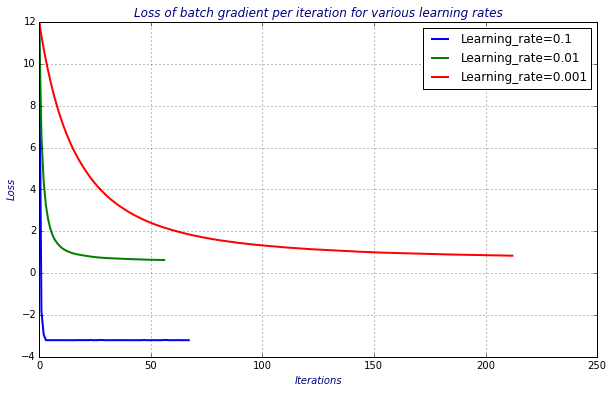

In [683]:
xsbl1 = np.arange(ibl1+1)
xsbl2 = np.arange(ibl2+1)
xsbl3 = np.arange(ibl3+1)
lines = plt.plot(xsbl1,vLossFunction(wbl1),xsbl2,vLossFunction(wbl2),xsbl3,vLossFunction(wbl3),lw=2.)
grid(True)
plt.legend(lines,['Learning_rate=0.1','Learning_rate=0.01','Learning_rate=0.001'])
plt.xlabel('Iterations',settings)
plt.ylabel('Loss',settings)
plt.title("Loss of batch gradient per iteration for various learning rates",settings)
plt.savefig('plots/learningsBatch.png')

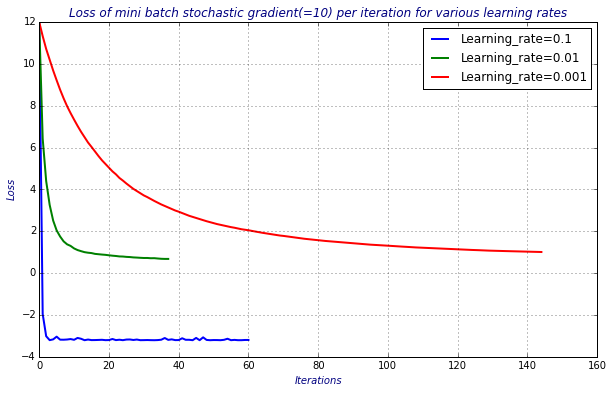

In [684]:
xsml1 = np.arange(iml1+1)
xsml2 = np.arange(iml2+1)
xsml3 = np.arange(iml3+1)
lines = plt.plot(xsml1,vLossFunction(wml1),xsml2,vLossFunction(wml2),xsml3,vLossFunction(wml3),lw=2.)
grid(True)
plt.legend(lines,['Learning_rate=0.1','Learning_rate=0.01','Learning_rate=0.001'])
plt.xlabel('Iterations',settings)
plt.ylabel('Loss',settings)
plt.title("Loss of mini batch stochastic gradient(=10) per iteration for various learning rates",settings)
plt.savefig('plots/learningsMini.png')

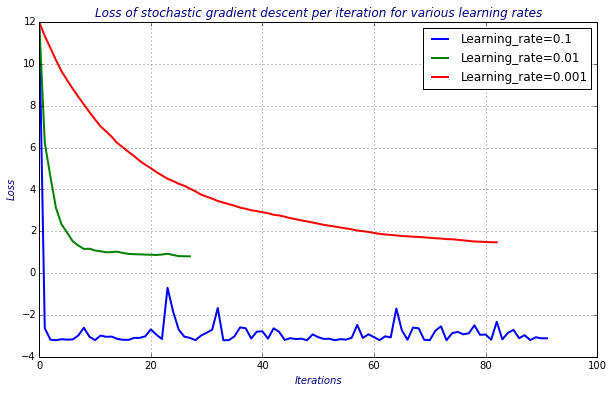

In [685]:
xsol1 = np.arange(iol1+1)
xsol2 = np.arange(iol2+1)
xsol3 = np.arange(iol3+1)
lines = plt.plot(xsol1,vLossFunction(wol1),xsol2,vLossFunction(wol2),xsol3,vLossFunction(wol3),lw=2.)
grid(True)
plt.legend(lines,['Learning_rate=0.1','Learning_rate=0.01','Learning_rate=0.001'])
plt.xlabel('Iterations',settings)
plt.ylabel('Loss',settings)
plt.title("Loss of stochastic gradient descent per iteration for various learning rates",settings)
plt.savefig('plots/learningsOnline.png')

<a id="exF"></a>
<center> <h2 style="border-top:solid;padding-top:1cm"> Exercise F</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<p style="font-size:large;margin-bottom:0.5cm">Introducing learning decay in stochastic gradient descent.First we will plot a progressive decay version that is based in the formula:</p> 

<center> $\lambda (s) = \frac{\lambda_{0}}{1+s \ast \lambda_{d}}$</center>
<div>
<ul>
    <li>$\lambda_{0} $: Initial learning rate </li>
    <li>$\lambda_{d} $: Learning Decay</li>
    <li>$s $: Iteration</li>
</ul>
</div>

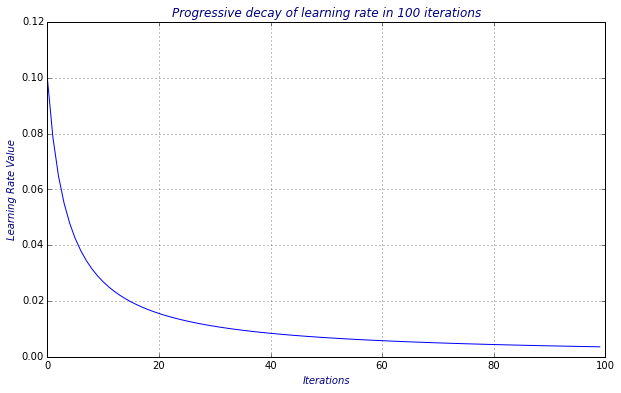

In [710]:
def setPlot(t,xl,yl):
    plt.title(t,settings)
    plt.xlabel(xl,settings)
    plt.ylabel(yl,settings)
    plt.grid(True)

l0 = 0.1
ld = math.e/10
ll=[l0]
for s in range(1,100):
    ll.append(l0/(1+s*ld))
    
plt.plot(np.arange(len(ll)),ll)
setPlot('Progressive decay of learning rate in 100 iterations','Iterations','Learning Rate Value')

In [714]:
# Use ITER SAMP and gnn from before alter only the getGrad and the miniBatch funcs
 
def decayMiniBatchGradientDescent(init,sampleSize,iterations,convergence,nois,
                             learningRate=0.1,batch=1):
    ws = [init]
    i=0
    while i<ITER:
        grads = getGrad(ws[i],sampleSize,i,nois)
        ch = np.random.choice(grads,replace=False,size=batch)
        ws.append(ws[i] - ll[i]*ch.mean())
        conv = abs(ws[i+1]-ws[i])
        convergence.append(conv)
        i=i+1
        if conv<0.001:
            break
    # return iteration where it broke and steps. Convergence list is updated
    return ws,i

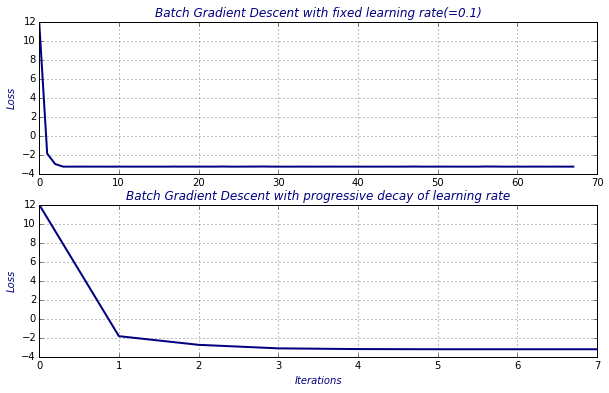

In [750]:
#Learning decay for batch gradient descent
convbd = []
wbd,ibd = decayMiniBatchGradientDescent(2,SAMP,ITER,convbd,gNN,learningRate=.1,batch=SAMP)
xsbd = np.arange(ibd+1)

f, axarr = plt.subplots(2, 1)
axarr[0].plot(xsbl1,vLossFunction(wbl1),lw=2.,c='navy')
axarr[0].set_title('Batch Gradient Descent with fixed learning rate(=0.1)',settings)
axarr[0].grid(True)
axarr[0].set_ylabel('Loss',settings)
axarr[1].plot(xsbd,vLossFunction(wbd),lw=2.,c='navy')
axarr[1].set_title('Batch Gradient Descent with progressive decay of learning rate',settings)
axarr[1].grid(True)
axarr[1].set_xlabel("Iterations",settings)
axarr[1].set_ylabel('Loss',settings)
plt.savefig('plots/decayBatch.png')

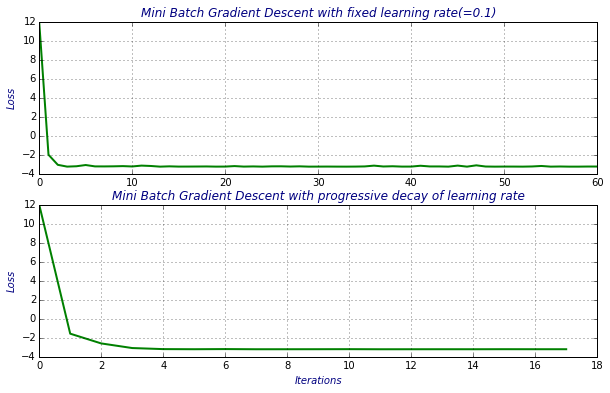

In [751]:
#Learning decay for stochastic mini batch gradient descent(=10)
convmd = []
wmd,imd = decayMiniBatchGradientDescent(2,SAMP,ITER,convmd,gNN,learningRate=.1,batch=10)
xsmd = np.arange(imd+1)

f, axarr = plt.subplots(2, 1)
axarr[0].plot(xsml1,vLossFunction(wml1),lw=2.,c='green')
axarr[0].set_title('Mini Batch Gradient Descent with fixed learning rate(=0.1)',settings)
axarr[0].grid(True)
axarr[0].set_ylabel('Loss',settings)
axarr[1].plot(xsmd,vLossFunction(wmd),lw=2.,c='green')
axarr[1].set_title('Mini Batch Gradient Descent with progressive decay of learning rate',settings)
axarr[1].grid(True)
axarr[1].set_xlabel("Iterations",settings)
axarr[1].set_ylabel('Loss',settings)
plt.savefig('plots/decayMiniBatch.png')

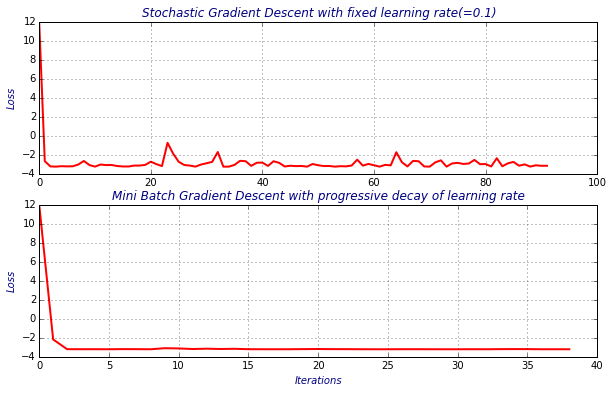

In [752]:
#Learning decay for stochastic mini batch gradient descent(=10)
convod = []
wod,iod = decayMiniBatchGradientDescent(2,SAMP,ITER,convod,gNN,learningRate=.1,batch=1)
xsod = np.arange(iod+1)

f, axarr = plt.subplots(2, 1)
axarr[0].plot(xsol1,vLossFunction(wol1),lw=2.,c='red')
axarr[0].set_title('Stochastic Gradient Descent with fixed learning rate(=0.1)',settings)
axarr[0].grid(True)
axarr[0].set_ylabel('Loss',settings)
axarr[1].plot(xsod,vLossFunction(wod),lw=2.,c='red')
axarr[1].set_title('Mini Batch Gradient Descent with progressive decay of learning rate',settings)
axarr[1].grid(True)
axarr[1].set_xlabel("Iterations",settings)
axarr[1].set_ylabel('Loss',settings)
plt.savefig('plots/decayOnline.png')

<a id="exG"></a>
<center> <h2 style="border-top:solid;padding-top:1cm"> Exercise G</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<p style="font-size:large;margin-bottom:1.5cm">We investigate the effect of the mini batch size on the convergence for the digits dataset. We also compute the test error after convergence</p>
<p> The loss function for l2 regularization is :</p> $\sum_{i=1}^{N}(w^{T}x_{i}-y_{i})^{2} + \lambda\ast \sum_{i=1}^{d}\left | w_{i} \right |^{2}$

In [759]:
from sklearn.linear_model import SGDClassifier
import pandas as pd

In [2611]:
dig = pd.read_csv('dataset.csv',header=0)
dig = dig.drop('Unnamed: 0',axis=1)
# Create a dataset with equal number of objects
digs = dig.drop(range(500,554) + range(1054,1125))
digs['Labels'] = 500*[-1] + 500*[1]
digs.index = range(0,1000)

digits = digs.as_matrix()
labs = digits[:,-1]
digits = digits[:,:-1]

#100,100 test set
zt = digits[0:100]
ot = digits[500:600]
testSet = np.concatenate((zt,ot),axis=0)

#400,400 train set
zc = digits[100:500]
oc = digits[600:1001]
trainSet = np.concatenate((zc,oc),axis=0)
tlabels = np.array([-1]*100+[1]*100)
labels = np.array([-1]*400+[1]*400)

# SCALED VERSION OF ALL THE DATASETS
szc = zc/255
soc = oc/255
sTrainSet = trainSet/255

szt = zt/255
sot = ot/255
sTestSet = testSet/255

In [2626]:
EPOCHS = 100
#MB_SIZE = 10
LR = 0.001
LAMBDA = 0.01

def trainMiniBatch(wspe,lpe):
    clf = SGDClassifier(alpha=LAMBDA,
                    #0.000001 is the perfect
                    eta0=LR,
                    fit_intercept=True,
                    learning_rate='constant',
                    loss='squared_loss',
                    n_iter=2,
                    penalty='l2',
                    shuffle=True,
                    verbose=0)
    for i in range(0,EPOCHS):
        #Generate the batches from the training set
        bg = batchGenerator(sTrainSet,labels,MB_SIZE)
        for batch,batchLabs in bg:
            clf.partial_fit(batch,batchLabs,classes=[-1,1])
            wspe[i] = clf.coef_
            lpe[i] = compLoss(sTrainSet,labels,clf.coef_,LAMBDA)
    return clf
    
#clf.fit(testSet,tlabels)

def makePredictions(clf):
    zeropreds = clf.predict(szc)
    onespreds = clf.predict(soc)
    false = (zeropreds==1).sum() + (onespreds==-1).sum()
    print 'Apparent error is %f'%(false/800)

    tzeropreds = clf.predict(szt)
    tonespreds = clf.predict(sot)
    tfalse = (tzeropreds==1).sum() + (tonespreds==-1).sum()
    print 'Test error is %f'%(tfalse/200)

In [2629]:
#train in batches for 10 epochs and mb = [10,100,500,800]

w10 = np.zeros((EPOCHS,64))
w100 = np.zeros((EPOCHS,64))
w500 = np.zeros((EPOCHS,64))
w800 = np.zeros((EPOCHS,64))

l10 = np.zeros(EPOCHS)
l100 = np.zeros(EPOCHS)
l500 = np.zeros(EPOCHS)
l800 = np.zeros(EPOCHS)

clf10 = trainMiniBatch(w10,l10)
clf100 = trainMiniBatch(w100,l100)
clf500 = trainMiniBatch(w500,l500)
clf800 = trainMiniBatch(w800,l800)

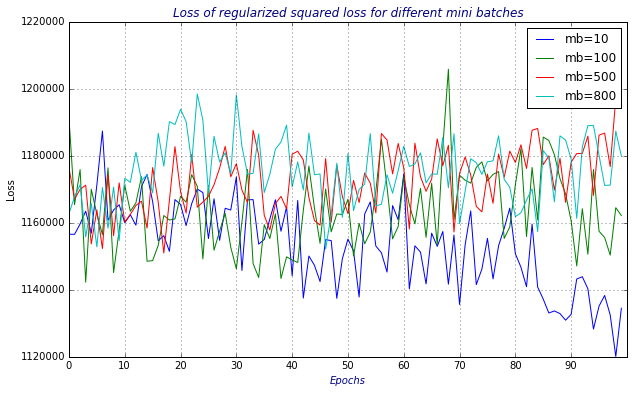

In [2634]:
lines = plt.plot(np.arange(EPOCHS),l10,
                 np.arange(EPOCHS),l100,
                 np.arange(EPOCHS),l500,
                 np.arange(EPOCHS),l800)
plt.xticks(np.arange(0,100,10))
plt.grid(True)
plt.title("Loss of regularized squared loss for different mini batches",settings)
plt.xlabel("Epochs",settings)
plt.ylabel("Loss")
plt.legend(lines,['mb=10','mb=100','mb=500','mb=800'])
plt.savefig('plots/digsVarMinis.png')

In [2635]:
makePredictions(clf10)
makePredictions(clf100)
makePredictions(clf500)
makePredictions(clf800)

Apparent error is 0.500000
Test error is 0.500000
Apparent error is 0.500000
Test error is 0.500000
Apparent error is 0.500000
Test error is 0.500000
Apparent error is 0.500000
Test error is 0.500000


In [2432]:
preds = np.zeros(len(sTrainSet))
for i in range(0,len(sTrainSet)):
    print np.sign(np.dot(sTrainSet[i],clf.coef_.T))

[-1.]
[-1.]
[ 1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[ 1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[ 1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[ 1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[ 1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[ 1.]
[-1.]
[-1.]
[ 1.]
[ 1.]
[ 1.]
[-1.]
[-1.]
[-1.]
[ 1.]
[-1.]
[-1.]
[-1.]
[ 1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[ 1.]
[-1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[-1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[-1.]
[-1.]
[-1.]
[ 1.]
[-1.]
[-1.]
[ 1.]
[-1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[-1.]
[ 1.]
[ 1.]
[ 1.]
[-1.]
[ 1.]
[-1.]
[ 1.]
[ 1.]
[ 1.]
[-1.]
[ 1.]
[ 1.]
[ 1.]
[-1.]
[ 1.]
[ 1.]
[-1.]
[ 1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.

<a id='myImplementation'></a>
<h3 style="margin-top:2cm"> My implementation of regression with L2 regularization term</h3>

In [2277]:
## implementation of the digits gradient descent 
## input : data(2d array), labels(1d array), learning_rate
##         ridge parameter, minibatch size, number of epochs

def batchGenerator(samples,sampl_labels,bs):
    #First make a permutation of the data samples
    idx = list(np.random.permutation(np.arange(len(samples))))
    samples = samples[idx,:]
    sampl_labels[idx]
    for i in range(0,len(samples),bs):
        yield samples[i:i+bs,:],sampl_labels[i:i+bs]

# This generator yields the values of the  parameters
# after each epoch depending on the size of the mini batch
def digsGD(data,labels,lr,lamda,mb,epochs):
    n_samples,n_features = data.shape
    ws = np.zeros(n_features)
    # number of batches until the whole data set has been 'seen'
    iter_per_epoch = int(n_samples/mb)
    #print 'Iterations per epoch are %f'%iter_per_epoch
    for i in range(0,epochs):
        for ite in range(0,iter_per_epoch):
            idx = list(np.random.choice(np.arange(len(data)),replace=False,size=mb))
            batch = data[idx,:]
            batchLabels = labels[idx]
            temps = np.zeros(mb)
            grads = np.empty(n_features)
            mat = np.dot(batch,ws.T) - batchLabels;
            for d in range(0,n_features):
                for s in range(0,mb):
                    temps[s] = mat[s] * data[s,d]
                grads[d] = 2*temps.sum() + 2*lamda*ws[d]
            ws = ws - (lr*(grads/mb))
        yield ws


def classificationError(testData,tlabs,coef):
    n_samples,n_features =  testData.shape
    no_false = 0
    for i in range(n_samples):
        pred = np.sign(np.dot(testData[i],coef.T))
        if pred!=tlabs[i]:
            no_false+=1
    return no_false/n_samples

def compLoss(data,labels,params,lamda):
    temp = np.dot(data,params.T) - labels
    return (temp**2).sum() + lamda*((params**2).sum())

In [2257]:
# train for mini batch = 10 and 10 epochs and check the loss for the parameters yielded
EPOCHS = 100
# mini batch size must be a multiple of the training set provided
BATCH_SIZES = [10,100,500,800] 
LR = 0.000001
LAMBDA = 0.001

ws_per_epoch10 = np.zeros((EPOCHS,64))
ws_per_epoch100 = np.zeros((EPOCHS,64))
ws_per_epoch500 = np.zeros((EPOCHS,64))
ws_per_epoch800 = np.zeros((EPOCHS,64))
loss_per_epoch10 = np.zeros(EPOCHS)
loss_per_epoch100 = np.zeros(EPOCHS)
loss_per_epoch500 = np.zeros(EPOCHS)
loss_per_epoch800 = np.zeros(EPOCHS)

classifier10 = digsGD(sTestSet,tlabels,LR,LAMBDA,BATCH_SIZES[0],EPOCHS)
classifier100 = digsGD(sTestSet,tlabels,LR,LAMBDA,BATCH_SIZES[1],EPOCHS)
classifier500 = digsGD(sTestSet,tlabels,LR,LAMBDA,BATCH_SIZES[2],EPOCHS)
classifier800 = digsGD(sTestSet,tlabels,LR,LAMBDA,BATCH_SIZES[3],EPOCHS)

for e in range(0,EPOCHS): 
    ws10 = classifier10.next()
    ws100 = classifier100.next()
    ws500 = classifier500.next()
    ws800 = classifier800.next()
    ws_per_epoch10[e] = ws10
    ws_per_epoch100[e] = ws100
    ws_per_epoch500[e] = ws500
    ws_per_epoch800[e] = ws800
    loss_per_epoch10[e] = compLoss(sTestSet,tlabels,ws10,LAMBDA)
    loss_per_epoch100[e] = compLoss(sTestSet,tlabels,ws100,LAMBDA)
    loss_per_epoch500[e] = compLoss(sTestSet,tlabels,ws500,LAMBDA)
    loss_per_epoch800[e] = compLoss(sTestSet,tlabels,ws800,LAMBDA)

<a id="exH"></a>
<center> <h2 style="border-top:solid;padding-top:1cm"> Exercise H</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>

<p style="font-size:large;margin-bottom:0.5cm">We investigate the effect of the learning rate on the convergence for the digits dataset. We also compute the test error after convergence</p> 

In [2637]:
MB_SIZE=1
LRS = [0.001,0.0001,0.00001,0.00001]

wl1 = np.zeros((EPOCHS,64))
wl2 = np.zeros((EPOCHS,64))
wl3 = np.zeros((EPOCHS,64))
wl4 = np.zeros((EPOCHS,64))

ll1 = np.zeros(EPOCHS)
ll2 = np.zeros(EPOCHS)
ll3 = np.zeros(EPOCHS)
ll4 = np.zeros(EPOCHS)

LR = 0.001
clfl1 = trainMiniBatch(wl1,ll1)
LR = 0.0001
clfl2 = trainMiniBatch(wl2,ll2)
LR = 0.00001
clfl3 = trainMiniBatch(wl3,ll3)
LR = 0.000001
clfl4 = trainMiniBatch(wl4,ll4)

    

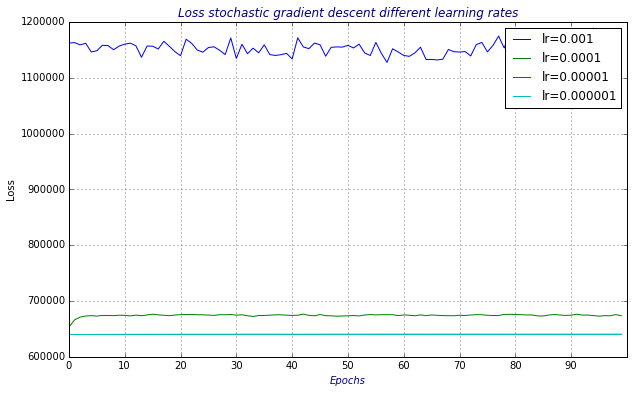

In [2644]:
lines = plt.plot(np.arange(EPOCHS),ll1,
                 np.arange(EPOCHS),ll2,
                 np.arange(EPOCHS),ll3,
                 np.arange(EPOCHS),ll4)
plt.xticks(np.arange(0,100,10))
plt.grid(True)
plt.title("Loss stochastic gradient descent different learning rates",settings)
plt.xlabel("Epochs",settings)
plt.ylabel("Loss")
plt.legend(lines,['lr=0.001','lr=0.0001','lr=0.00001','lr=0.000001'])
plt.savefig('plots/digsVarLrs.png')

<a id="exI"></a>
<center> <h2 style="border-top:solid;padding-top:1cm"> Exercise I</h2></center>
<div style="text-align:right">
<a href="#top">[Back to top]</a>
</div>